# Flight Delays

In [1]:
import pandas as pd
import glob
import os
import requests
import json
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import random
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

from keras import regularizers
from keras import models
from keras import layers
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight

from datetime import datetime, timedelta

import keras
from keras.models import Sequential
from keras.layers import Dense

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Business Understanding

MVP should support:

* [Top 8 US Airlines](https://www.statista.com/statistics/250577/domestic-market-share-of-leading-us-airlines/)
 * American Airlines
 * Delta Air Lines
 * United Airlines
 * Southwest Airlines
 * Alaska Airlines
 * JetBlue Airways
 * Spirit
 * SkyWest
* [Large and medium airport hubs](https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/passenger/media/cy20-commercial-service-enplanements.pdf)
 * "The term hub is used by the FAA to identify very busy commercial service airports. Large hubs are the airports that each account for at least one percent of total U.S. passenger enplanements."
 * In 2020 these accounted for 84% of all enplanements


### Airports
| State | Locid | City                  | Airport Name                                           | CY 20 Enplanements |
|-------|-------|-----------------------|--------------------------------------------------------|--------------------|
| GA    | ATL   | Atlanta               | Hartsfield - Jackson Atlanta International             |         20,559,866 |
| TX    | DFW   | Fort Worth            | Dallas-Fort Worth International                        |         18,593,421 |
| CO    | DEN   | Denver                | Denver International                                   |         16,243,216 |
| IL    | ORD   | Chicago               | Chicago O'Hare International                           |         14,606,034 |
| CA    | LAX   | Los Angeles           | Los Angeles International                              |         14,055,777 |
| NC    | CLT   | Charlotte             | Charlotte/Douglas International                        |         12,952,869 |
| NV    | LAS   | Las Vegas             | Harry Reid International                               |         10,584,059 |
| AZ    | PHX   | Phoenix               | Phoenix Sky Harbor International                       |         10,531,436 |
| FL    | MCO   | Orlando               | Orlando International                                  |         10,467,728 |
| WA    | SEA   | Seattle               | Seattle-Tacoma International                           |          9,462,411 |
| FL    | MIA   | Miami                 | Miami International                                    |          8,786,007 |
| TX    | IAH   | Houston               | George Bush Intcntl/Houston                            |          8,682,558 |
| NY    | JFK   | New York              | John F Kennedy International                           |          8,269,819 |
| FL    | FLL   | Fort Lauderdale       | Fort Lauderdale/Hollywood International                |          8,015,744 |
| NJ    | EWR   | Newark                | Newark Liberty International                           |          7,985,474 |
| CA    | SFO   | San Francisco         | San Francisco International                            |          7,745,057 |
| MN    | MSP   | Minneapolis           | Minneapolis-St Paul International/Wold-  Chamberlain   |          7,069,720 |
| MI    | DTW   | Detroit               | Detroit Metro Wayne County                             |          6,822,324 |
| MA    | BOS   | Boston                | General Edward Lawrence Logan   International          |          6,035,452 |
| UT    | SLC   | Salt Lake City        | Salt Lake City International                           |          5,981,032 |
| PA    | PHL   | Philadelphia          | Philadelphia International                             |          5,753,239 |
| MD    | BWI   | Glen Burnie           | Baltimore/Washington International   Thurgood Marshall |          5,451,355 |
| FL    | TPA   | Tampa                 | Tampa International                                    |          4,966,775 |
| CA    | SAN   | San Diego             | San Diego International                                |          4,637,856 |
| IL    | MDW   | Chicago               | Chicago Midway International                           |          4,236,603 |
| NY    | LGA   | New York              | Laguardia                                              |          4,147,116 |
| TN    | BNA   | Nashville             | Nashville International                                |          4,013,995 |
| VA    | IAD   | Dulles                | Washington Dulles International                        |          3,862,658 |
| TX    |   DAL | Dallas                | Dallas Love Field                                      |          3,669,930 |
| VA    | DCA   | Arlington             | Ronald Reagan Washington Ntl                           |          3,573,489 |
| OR    | PDX   | Portland              | Portland International                                 |          3,455,877 |
| TX    | AUS   | Austin                | Austin-Bergstrom International                         |          3,141,505 |
| TX    | HOU   | Houston               | William P Hobby                                        |          3,127,178 |
| HI    | HNL   | Honolulu              | Daniel K Inouye International                          |          3,126,391 |
| MO    | STL   | St. Louis             | St Louis Lambert International                         |          3,041,765 |
| FL    | RSW   | Fort Myers            | Southwest Florida International                        |          2,947,139 |
| CA    | SMF   | Sacramento            | Sacramento International                               |          2,710,342 |
| LA    | MSY   | New Orleans -  Kenner | Louis Armstrong New Orleans   International            |          2,632,606 |
| PR    | SJU   | San Juan              | Luis Munoz Marin International                         |          2,362,851 |
| NC    | RDU   | Raleigh               | Raleigh-Durham International                           |          2,337,496 |
| CA    | SJC   | San Jose              | Norman Y Mineta San Jose International                 |          2,283,186 |
| CA    | OAK   | Oakland               | Metro Oakland International                            |          2,271,294 |
| MO    | MCI   | Kansas City           | Kansas City International                              |          2,167,616 |
| OH    | CLE   | Cleveland             | Cleveland-Hopkins International                        |          1,990,156 |
| IN    | IND   | Indianapolis          | Indianapolis International                             |          1,989,126 |
| TX    | SAT   | San Antonio           | San Antonio International                              |          1,919,958 |
| CA    | SNA   | Santa Ana             | John Wayne/Orange County                               |          1,824,836 |
| PA    | PIT   | Pittsburgh            | Pittsburgh International                               |          1,742,406 |
| KY    | CVG   | Hebron                | Cincinnati/Northern Kentucky   International           |          1,729,395 |
| OH    | CMH   | Columbus              | John Glenn Columbus International                      |          1,577,596 |
| FL    | PBI   | West Palm   Beach     | Palm Beach International                               |          1,518,732 |
| FL    | JAX   | Jacksonville          | Jacksonville International                             |          1,367,501 |
| WI    | MKE   | Milwaukee             | General Mitchell International                         |          1,263,385 |
| CA    | ONT   | Ontario               | Ontario International                                  |          1,237,946 |
| AK    | ANC   | Anchorage             | Ted Stevens Anchorage International                    |          1,157,301 |
| CT    | BDL   | Windsor Locks         | Bradley International                                  |          1,150,033 |
| HI    | OGG   | Kahului               | Kahului                                                |          1,135,141 |
| CA    | BUR   | Burbank               | Bob Hope                                               |          1,056,838 |
| NE    | OMA   | Omaha                 | Eppley Airfield                                        |          1,036,245 |
| TN    | MEM   | Memphis               | Memphis International                                  |          1,015,981 |
| ID    | BOI   | Boise                 | Boise Air Trml/Gowen Field                             |            991,241 |
| NV    | RNO   | Reno                  | Reno/Tahoe International                               |            976,937 |
| SC    | CHS   | Charleston            | Charleston AFB/International                           |            944,660 |
| OK    | OKC   | Oklahoma City         | Will Rogers World                                      |            934,842 |

## Data

In [2]:
# flight_data = glob.glob(os.path.join('data/flights/', "*.csv"))

# df = pd.concat((pd.read_csv(f) for f in flight_data), ignore_index=True)

# df['FL_DATE'] = df['FL_DATE'].astype('datetime64[ns]')

In [3]:
# cols_to_drop = ['MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'OP_CARRIER_FL_NUM', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME',
#                'ARR_DELAY', 'CANCELLED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
# df.drop(cols_to_drop, axis = 1, inplace=True)

## Airport Congestion

In [4]:
# # First, we need to clean up the time field so that it's easier to work with
# # The dataset stores time as a float, and we want to conver it to a datetime format

# def float_to_time(time):
#     time_str = str(time)
#     digits = len(time_str)
#     if digits < 2:
#         return '00:0' + str(time)
#     if digits == 2:
#         return '00:' + str(time)
#     if digits == 3:
#         return '0' + time_str[:1] + ':' + time_str[1:]
#     if digits == 4:
#         return time_str[:2] + ':' + time_str[2:]
    
    
# # Dealing with time is tricky since flights can depart at odd times/horus. To simplify, we'll round the takeoff times.

# def hour_rounder(t):
#     # Rounds to nearest hour by adding a timedelta hour if minute >= 30
#     return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
#                +timedelta(hours=t.minute//30))

In [5]:
# df['scheduled-takeoff-time'] = df['CRS_DEP_TIME'].apply(float_to_time)
# df['scheduled-takeoff'] =  pd.to_datetime(df['FL_DATE'].astype(str) + ' ' + df['scheduled-takeoff-time'])
# df['rounded-takeoff'] = df['scheduled-takeoff'].apply(hour_rounder)
# df['take-off-rounded-hour'] = df['rounded-takeoff'].dt.hour

In [6]:
# df['congestion-by-hour-key'] = df['ORIGIN'] \
#                         + df['MONTH'].astype(str) \
#                         + df['DAY_OF_MONTH'].astype(str) \
#                         + df['take-off-rounded-hour'].astype(str)

# df['congestion-by-day-key'] = df['ORIGIN'] \
#                         + df['MONTH'].astype(str) \
#                         + df['DAY_OF_MONTH'].astype(str)

In [7]:
# airport_congestion_by_hour = df.groupby('congestion-by-hour-key')['TAIL_NUM'].count()
# airport_congestion_by_hour = airport_congestion_by_hour.to_frame()
# airport_congestion_by_hour.reset_index(inplace=True)
# airport_congestion_by_hour.rename(columns={'TAIL_NUM': 'count_of_flights'}, inplace=True)

In [8]:
# years_covered = df.groupby('congestion-by-hour-key')['YEAR'].nunique()
# years_covered = years_covered.to_frame()
# years_covered.reset_index(inplace=True)
# years_covered.rename(columns={'YEAR': 'years_covered'}, inplace=True)

In [9]:
# airport_congestion_by_day = df.groupby('congestion-by-day-key')['TAIL_NUM'].count()
# airport_congestion_by_day = airport_congestion_by_day.to_frame()
# airport_congestion_by_day.reset_index(inplace=True)
# airport_congestion_by_day.rename(columns={'TAIL_NUM': 'count_flights_day_of'}, inplace=True)

In [10]:
# df['rounded-takeoff-Tminus-1'] = df['rounded-takeoff'] - timedelta(hours=1, minutes=0)
# df['rounded-takeoff-Tminus-2'] = df['rounded-takeoff'] - timedelta(hours=2, minutes=0)
# df['rounded-takeoff-Tminus-3'] = df['rounded-takeoff'] - timedelta(hours=3, minutes=0)
# df['rounded-takeoff-Tminus-4'] = df['rounded-takeoff'] - timedelta(hours=4, minutes=0)
# df['rounded-takeoff-Tminus-5'] = df['rounded-takeoff'] - timedelta(hours=5, minutes=0)
# df['rounded-takeoff-Tminus-6'] = df['rounded-takeoff'] - timedelta(hours=6, minutes=0)
# df['rounded-takeoff-Tminus-7'] = df['rounded-takeoff'] - timedelta(hours=7, minutes=0)
# df['rounded-takeoff-Tminus-8'] = df['rounded-takeoff'] - timedelta(hours=8, minutes=0)
# df['rounded-takeoff-Tminus-9'] = df['rounded-takeoff'] - timedelta(hours=9, minutes=0)
# df['rounded-takeoff-Tminus-10'] = df['rounded-takeoff'] - timedelta(hours=10, minutes=0)
# df['rounded-takeoff-Tminus-11'] = df['rounded-takeoff'] - timedelta(hours=11, minutes=0)
# df['rounded-takeoff-Tminus-12'] = df['rounded-takeoff'] - timedelta(hours=12, minutes=0)

In [11]:
# df['congestion-Tminus-1-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-1']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-1']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-1']).hour.astype(str).astype(str)

# df['congestion-Tminus-2-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-2']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-2']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-2']).hour.astype(str).astype(str)

# df['congestion-Tminus-3-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-3']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-3']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-3']).hour.astype(str).astype(str)

# df['congestion-Tminus-4-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-4']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-4']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-4']).hour.astype(str).astype(str)

# df['congestion-Tminus-5-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-5']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-5']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-5']).hour.astype(str).astype(str)

# df['congestion-Tminus-6-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-6']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-6']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-6']).hour.astype(str).astype(str)

# df['congestion-Tminus-7-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-7']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-7']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-7']).hour.astype(str).astype(str)

# df['congestion-Tminus-8-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-8']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-8']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-8']).hour.astype(str).astype(str)

# df['congestion-Tminus-9-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-9']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-9']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-9']).hour.astype(str).astype(str)

# df['congestion-Tminus-10-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-10']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-10']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-10']).hour.astype(str).astype(str)

# df['congestion-Tminus-11-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-11']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-11']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-11']).hour.astype(str).astype(str)

# df['congestion-Tminus-12-key'] = df['ORIGIN'] \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-12']).month.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-12']).day.astype(str) \
#                         + pd.DatetimeIndex(df['rounded-takeoff-Tminus-12']).hour.astype(str).astype(str)

In [14]:
# df = df.merge(airport_congestion_by_hour, on='congestion-by-hour-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-by-hour-key", "congestion-Tminus-1-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights", "count_of_flights-Tminus-1")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-1-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-1-key", "congestion-Tminus-2-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-1", "count_of_flights-Tminus-2")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-2-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-2-key", "congestion-Tminus-3-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-2", "count_of_flights-Tminus-3")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-3-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-3-key", "congestion-Tminus-4-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-3", "count_of_flights-Tminus-4")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-4-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-4-key", "congestion-Tminus-5-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-4", "count_of_flights-Tminus-5")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-5-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-5-key", "congestion-Tminus-6-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-5", "count_of_flights-Tminus-6")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-6-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-6-key", "congestion-Tminus-7-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-6", "count_of_flights-Tminus-7")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-7-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-7-key", "congestion-Tminus-8-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-7", "count_of_flights-Tminus-8")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-8-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-8-key", "congestion-Tminus-9-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-8", "count_of_flights-Tminus-9")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-9-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-9-key", "congestion-Tminus-10-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-9", "count_of_flights-Tminus-10")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-10-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-10-key", "congestion-Tminus-11-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-10", "count_of_flights-Tminus-11")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-11-key')
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("congestion-Tminus-11-key", "congestion-Tminus-12-key")
# airport_congestion_by_hour.columns = airport_congestion_by_hour.columns.str.replace("count_of_flights-Tminus-11", "count_of_flights-Tminus-12")
# df = df.merge(airport_congestion_by_hour, on='congestion-Tminus-12-key')
# df = df.merge(airport_congestion_by_day, on='congestion-by-day-key')
# df = df.merge(years_covered, on='congestion-by-hour-key')

In [23]:
# # Let's remove all the extra columns that were created for the purpose of engineering these features
# new_cols_to_drop = ['congestion-by-hour-key',
#                     'take-off-rounded-hour',
#                     'scheduled-takeoff',
#                     'rounded-takeoff',
#                     'congestion-Tminus-1-key',
#                     'congestion-Tminus-2-key',
#                     'congestion-Tminus-3-key',
#                     'congestion-Tminus-4-key',
#                     'congestion-Tminus-5-key',
#                     'congestion-Tminus-6-key',
#                     'congestion-Tminus-7-key',
#                     'congestion-Tminus-8-key',
#                     'congestion-Tminus-9-key',
#                     'congestion-Tminus-10-key',
#                     'congestion-Tminus-11-key',
#                     'congestion-Tminus-12-key',
#                     'congestion-by-day-key',
#                     'rounded-takeoff-Tminus-1',
#                     'rounded-takeoff-Tminus-2',
#                     'rounded-takeoff-Tminus-3',
#                     'rounded-takeoff-Tminus-4',
#                     'rounded-takeoff-Tminus-5',
#                     'rounded-takeoff-Tminus-6',
#                     'rounded-takeoff-Tminus-7',
#                     'rounded-takeoff-Tminus-8',
#                     'rounded-takeoff-Tminus-9',
#                     'rounded-takeoff-Tminus-10',
#                     'rounded-takeoff-Tminus-11',
#                     'rounded-takeoff-Tminus-12'            
# ]

# df.drop(new_cols_to_drop, axis = 1, inplace=True)

In [24]:
# df.to_csv('data/flight_data_with_congestion.csv', index=False)

In [3]:
# df = pd.read_csv('data/flight_data_with_congestion.csv')

In [5]:
# df['count_flights_last_0_hours'] = df['count_of_flights']
# df['count_flights_last_1_hours'] = df['count_of_flights-Tminus-1']
# df['count_flights_last_3_hours'] = df['count_of_flights-Tminus-1'] \
#                                     + df['count_of_flights-Tminus-2'] \
#                                     + df['count_of_flights-Tminus-3']
# df['count_flights_last_6_hours'] = df['count_of_flights-Tminus-1'] \
#                                     + df['count_of_flights-Tminus-2'] \
#                                     + df['count_of_flights-Tminus-3'] \
#                                     + df['count_of_flights-Tminus-4'] \
#                                     + df['count_of_flights-Tminus-5'] \
#                                     + df['count_of_flights-Tminus-6'] 
# df['count_flights_last_12_hours'] = df['count_of_flights-Tminus-1'] \
#                                     + df['count_of_flights-Tminus-2'] \
#                                     + df['count_of_flights-Tminus-3'] \
#                                     + df['count_of_flights-Tminus-4'] \
#                                     + df['count_of_flights-Tminus-5'] \
#                                     + df['count_of_flights-Tminus-6'] \
#                                     + df['count_of_flights-Tminus-7'] \
#                                     + df['count_of_flights-Tminus-8'] \
#                                     + df['count_of_flights-Tminus-9'] \
#                                     + df['count_of_flights-Tminus-10'] \
#                                     + df['count_of_flights-Tminus-11'] \
#                                     + df['count_of_flights-Tminus-12']

In [7]:
# df['avg_flights_last_0_hours'] = df['count_flights_last_0_hours'] / df['years_covered']
# df['avg_flights_last_1_hours'] = df['count_flights_last_1_hours'] / df['years_covered']
# df['avg_flights_last_3_hours'] = df['count_flights_last_3_hours'] / df['years_covered']
# df['avg_flights_last_6_hours'] = df['count_flights_last_6_hours'] / df['years_covered']
# df['avg_flights_last_12_hours'] = df['count_flights_last_12_hours'] / df['years_covered']

In [9]:
# new_cols_to_drop = ['count_of_flights-Tminus-1', 'count_of_flights-Tminus-2', 'count_of_flights-Tminus-3',
#                     'count_of_flights-Tminus-4', 'count_of_flights-Tminus-5', 'count_of_flights-Tminus-6',
#                     'count_of_flights-Tminus-7', 'count_of_flights-Tminus-8', 'count_of_flights-Tminus-9',
#                     'count_of_flights-Tminus-10', 'count_of_flights-Tminus-11', 'count_of_flights-Tminus-12',
#                    'count_flights_last_0_hours', 'count_flights_last_1_hours', 'count_flights_last_3_hours',
#                    'count_flights_last_6_hours', 'count_flights_last_12_hours', 'years_covered']

# df.drop(new_cols_to_drop, axis = 1, inplace=True)

In [2]:
# Create list of relevant aiports based on business case
relevant_airports = ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'CLT', 'LAS', 'PHX', 
                     'MCO', 'SEA', 'MIA', 'IAH', 'JFK', 'FLL', 'EWR', 'SFO', 'MSP', 'DTW',
                     'BOS', 'SLC', 'PHL', 'BWI', 'TPA', 'SAN', 'MDW', 'LGA', 'BNA', 'IAD',
                     'DAL', 'DCA', 'PDX', 'AUS', 'HOU', 'HNL', 'STL', 'RSW', 'SMF', 'MSY',
                     'SJU', 'RDU', 'OAK', 'MCI', 'CLE', 'IND', 'SAT', 'SNA', 'PIT', 'CVG',
                     'CMH', 'PBI', 'JAX', 'MKE', 'ONT', 'ANC', 'BDL', 'OGG', 'OMA', 'MEM',
                     'BOI', 'RNO', 'CHS', 'OKC']

# Create list of relevant IATA airline designators based on business case
relevant_airlines = ['WN', # Southwest
                     'DL', # Delta
                     'OO', # SkyWest
                     'AA', # American Airlines
                     'UA', # United Airlines
                     'B6', # JetBlue
                     'AS', # Alaska Airlines
                     'NK', # Spirit Airlines
                    ]

# # Filter Dataframe to include only relevant airlines & airports
# airport_filter = '|'.join(relevant_airports)
# airline_filter = '|'.join(relevant_airlines)

# df = df[df['ORIGIN'].str.contains(airport_filter) & df['DEST'].str.contains(airport_filter)]

# df = df[df['OP_CARRIER'].str.contains(airline_filter)]

# df.to_csv('data/filtered_data.csv', index=False)

| Field               | Description                                                                                                                                                         |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| YEAR                | Year                                                                                                                                                                |
| MONTH               | Month                                                                                                                                                               |
| DAY_OF_WEEK         | Day of Week                                                                                                                                                         |
| FL_DATE             | Flight Date (yyyymmdd)                                                                                                                                              |
| MKT_UNIQUE_CARRIER  | Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2).    |
| MKT_CARRIER_FL_NUM  | Flight Number                                                                                                                                                       |
| OP_UNIQUE_CARRIER   | Flight NumberUnique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2)  |
| ORIGIN              | Origin Airport                                                                                                                                                     |
| ORIGIN_WAC          | Origin Airport, World Area Code                                                                                                                                     |
| DEST                | Destination Airport                                                                                                                                                |
| DEST_WAC            | Destination Airport, World Area Code                                                                                                                                |
| CRS_DEP_TIME        | CRS Departure Time (local time: hhmm)                                                                                                                               |
| DEP_TIME            | Actual Departure Time (local time: hhmm)                                                                                                                            |
| DEP_DELAY_NEW       | Difference in minutes between scheduled and actual departure time. Early departures set to 0.                                                                       |
| TAXI_OUT            | Taxi Out Time, in Minutes                                                                                                                                           |
| TAXI_IN             | Taxi In Time, in Minutes                                                                                                                                            |
| CRS_ARR_TIME        | CRS Arrival Time (local time: hhmm)                                                                                                                                 |
| ARR_TIME            | Actual Arrival Time (local time: hhmm)                                                                                                                              |
| ARR_DELAY_NEW       | Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.                                                                           |
| CARRIER_DELAY       | Carrier Delay, in Minutes                                                                                                                                           |
| WEATHER_DELAY       | Weather Delay, in Minutes                                                                                                                                           |
| NAS_DELAY           | National Air System Delay, in Minutes                                                                                                                               |
| SECURITY_DELAY      | Security Delay, in Minutes                                                                                                                                         |
| LATE_AIRCRAFT_DELAY | Late Aircraft Delay, in Minutes                                                                                                                                    |


### Estimating flight volume

A useful metric to estimate delays may be "traffic". There are a few measures of traffic that may be interesting to look at.

* Traffic in the hour a particular flight is scheduled to depart.
* Traffic in the last hour
* Traffic that day

## How many stops does a plane make in a 48 hour period?

In [8]:
# # Let's check, on average, how many unique origins a plane goes through in a day
# df['month-day-tail'] = df['MONTH'].astype(str) + df['DAY_OF_MONTH'].astype(str) + df['YEAR'].astype(str) + df['TAIL_NUM']
# df.groupby('month-day-tail')[['ORIGIN', 'DEST']].nunique().describe()

,ORIGIN,DEST
count,5.798893e+06,5.798893e+06
mean,3.375936e+00,3.384057e+00
std,1.454625e+00,1.462599e+00
min,1.000000e+00,1.000000e+00
25%,2.000000e+00,2.000000e+00
50%,3.000000e+00,3.000000e+00
75%,4.000000e+00,4.000000e+00
max,2.800000e+01,3.000000e+01


Looks like, on average, a single tail number appears at 3 unique locations within a single day.

So when we do our analysis, we will want to examine flight data for a record plus it's last 2 stops.

In [12]:
# def categorise(row):  
#     if row['origin_1_hop_back'] == row['ORIGIN']:
#         return row['dest_1_hop_back']
#     else:
#         return row['origin_1_hop_back']

In [13]:
# # Get previous airport & date/time
# df.sort_values('FL_DATE', inplace=True)

# # 1 hop back
# df['origin_1_hop_back'] = df.groupby('TAIL_NUM')['ORIGIN'].shift(periods=1, fill_value=0)
# df['dest_1_hop_back'] = df.groupby('TAIL_NUM')['DEST'].shift(periods=1, fill_value=0)
# df['airport_1_hop_back'] = df.apply(lambda row: categorise(row), axis=1)
# df['airport_1_hop_back_date'] = df.groupby('TAIL_NUM')['FL_DATE'].shift(periods=1, fill_value=0)
# df['airport_1_hop_back_avg_flights_last_0_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_0_hours'].shift(periods=1, fill_value=0)
# df['airport_1_hop_back_avg_flights_last_1_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_1_hours'].shift(periods=1, fill_value=0)
# df['airport_1_hop_back_avg_flights_last_3_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_3_hours'].shift(periods=1, fill_value=0)
# df['airport_1_hop_back_avg_flights_last_6_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_6_hours'].shift(periods=1, fill_value=0)
# df['airport_1_hop_back_avg_flights_last_12_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_12_hours'].shift(periods=1, fill_value=0)

# # 2 hops back
# df['airport_2_hop_back'] = df.groupby('TAIL_NUM')['ORIGIN'].shift(periods=2, fill_value=0)
# df['airport_2_hop_back_date'] = df.groupby('TAIL_NUM')['FL_DATE'].shift(periods=2, fill_value=0)
# df['airport_2_hop_back_avg_flights_last_0_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_0_hours'].shift(periods=2, fill_value=0)
# df['airport_2_hop_back_avg_flights_last_1_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_1_hours'].shift(periods=2, fill_value=0)
# df['airport_2_hop_back_avg_flights_last_3_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_3_hours'].shift(periods=2, fill_value=0)
# df['airport_2_hop_back_avg_flights_last_6_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_6_hours'].shift(periods=2, fill_value=0)
# df['airport_2_hop_back_avg_flights_last_12_hours'] = df.groupby('TAIL_NUM')['avg_flights_last_12_hours'].shift(periods=2, fill_value=0)

In [15]:
# df = df.loc[(df['airport_1_hop_back'] != 0) & (df['airport_2_hop_back'] != 0)]
# df.to_csv('data/filtered_data_with_hops.csv', index=False)

In [3]:
# df_carrier_filtered =  pd.read_csv('data/filtered_data_with_hops.csv')

### What causes delays?
Here is a list of delay causes since 2018 as reported by the [Bureau of Transportation Statistics (BTS)](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations).

| Year    | Air Carrier Delay (%) | Aircraft Arriving Late (%) | National Aviation System Delay (%) | Security Delay (%) | Extreme Weather (%) |
|---------|:---------------------:|:--------------------------:|:----------------------------------:|:------------------:|:-------------------:|
| 2018    |           30          |             40             |                 25                 |        0.10        |          6          |
| 2019    |           31          |             40             |                 24                 |        0.10        |          6          |
| 2020    |           41          |             30             |                 22                 |        0.20        |          7          |
| Average |           34          |             37             |                 23                 |        0.13        |          6          |

The breakout provided by the Bureau of Transportation Statistics is a little misleading when it comes to delays caused by weather. They explain it:

"There is another category of weather within the [National Aviation System Delay] category. This type of weather slows the operations of the system but does not prevent flying. Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration. During 2020, 45.8% of NAS delays were due to weather."

"A true picture of total weather-related delays requires several steps. First, the extreme weather delays must be combined with the NAS weather category. Second, a calculation must be made to determine the weather-related delays included in the "late-arriving aircraft" category. Airlines do not report the causes of the late-arriving aircraft but an allocation can be made using the proportion of weather related-delays and total flights in the other categories."

| Year    | Weather Related Delays |
|---------|------------------------|
| 2018    |           38           |
| 2019    |           39           |
| 2020    |           29           |
| 2021    |           27           |
| Average |           33           |

Given the importance of weather as a delay factor, we will work to bring in weather data into our analysis.

### Bringing in Weather Data

One of the best sources of data is the National Oceanic and Atmospheric Administration (NOAA). It has weather stations all over the United States which collect weather data. This data can then be downloaded through their API.

We'll work to link NOAA weather data at the scheduled departure time for each flight.

We will be looking for the following weather stats:
* Temperature
* Precipitation
* Surface wind
* Ceiling & Visibility
 * Ceiling: The height above the earth's surface of the lowest layer reported as broken or overcast, or as the vertical visibility into an indefinite ceiling
 * Visibility: the vertical distance that an observer or some remote sensing device can see into a cloud
 
Data from NOAA by weather station is available [here](https://www.ncei.noaa.gov/data/normals-hourly/2006-2020/access/).

|                                         Airport Name |  Station ID |
|-----------------------------------------------------:|------------:|
|           Hartsfield - Jackson Atlanta International | USW00013874 |
|                      Dallas-Fort Worth International | USW00003927 |
|                                 Denver International | USW00003017 |
|                         Chicago O'Hare International | USW00094846 |
|                            Los Angeles International | USW00023174 |
|                      Charlotte/Douglas International | USW00013881 |
|                             Harry Reid International | USW00023169 |
|                     Phoenix Sky Harbor International | USW00023183 |
|                                Orlando International | USW00012815 |
|                         Seattle-Tacoma International | USW00024233 |
|                                  Miami International | USW00012839 |
|                          George Bush Intcntl/Houston | USW00012960 |
|                         John F Kennedy International | USW00094789 |
|              Fort Lauderdale/Hollywood International | USW00012849 |
|                         Newark Liberty International | USW00014734 |
|                          San Francisco International | USW00023234 |
|  Minneapolis-St Paul International/Wold- Chamberlain | USW00014922 |
|                           Detroit Metro Wayne County | USW00094847 |
|          General Edward Lawrence Logan International | USW00014739 |
|                         Salt Lake City International | USW00024127 |
|                           Philadelphia International | USW00013739 |
| Baltimore/Washington International Thurgood Marshall | USW00093721 |
|                                  Tampa International | USW00012842 |
|                              San Diego International | USW00023188 |
|                         Chicago Midway International | USW00014819 |
|                                            Laguardia | USW00014732 |
|                              Nashville International | USW00013897 |
|                      Washington Dulles International | USW00093738 |
|                                    Dallas Love Field | USW00013960 |
|                         Ronald Reagan Washington Ntl | USW00013743 |
|                               Portland International | USW00024229 |
|                       Austin-Bergstrom International | USW00013904 |
|                                      William P Hobby | USW00012918 |
|                        Daniel K Inouye International | USW00022521 |
|                       St Louis Lambert International | USW00013994 |
|                      Southwest Florida International | USW00012835 |
|                             Sacramento International | USW00023232 |
|            Louis Armstrong New Orleans International | USW00012916 |
|                       Luis Munoz Marin International | USW00022010 |
|                         Raleigh-Durham International | USW00013722 |
|                          Metro Oakland International | USW00023230 |
|                            Kansas City International | USW00003947 |
|                      Cleveland-Hopkins International | USW00014820 |
|                           Indianapolis International | USW00093819 |
|                            San Antonio International | USW00012921 |
|                             John Wayne/Orange County | USW00093184 |
|                             Pittsburgh International | USW00094823 |
|           Cincinnati/Northern Kentucky International | USW00093814 |
|                    John Glenn Columbus International | USW00014821 |
|                             Palm Beach International | USW00012844 |
|                           Jacksonville International | USW00013889 |
|                       General Mitchell International | USW00014839 |
|                                Ontario International | USW00003102 |
|                  Ted Stevens Anchorage International | USW00026451 |
|                                Bradley International | USW00014740 |
|                                              Kahului | USW00022516 |
|                                      Eppley Airfield | USW00014942 |
|                                Memphis International | USW00013893 |
|                           Boise Air Trml/Gowen Field | USW00024131 |
|                             Reno/Tahoe International | USW00023185 |
|                         Charleston AFB/International | USW00013880 |
|                                    Will Rogers World | USW00013967 |

In [13]:
# def get_keys(path):
#     with open(path) as f:
#         return json.load(f)
    
# keys = get_keys("C:/Users/Robert/.secret/noaa_api.json")

# api_key = keys['api_key']

# import time

# weather_stations = {}

# for i in station_list:
#     weather_stations[i] = {'DATE': [], 'TAVG': [], 'SNOW': [], 'PRCP': [], 'AWND': []}

# for year in range(2018, 2022):
#     year = str(year)
#     for station in weather_stations:
#         current_station = str(station)
#         print('Working on year: '+year +' and station: '+ current_station)
#         #make the api call
#         time.sleep(1)
#         r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG,SNOW,PRCP,AWND&limit=1000&stationid=GHCND:'+current_station+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':api_key})
#         r2 = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG,SNOW,PRCP,AWND&offset=1001&limit=1000&stationid=GHCND:'+current_station+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':api_key})
#         #load the api response as a json
#         d = json.loads(r.text)
#         d2 = json.loads(r2.text)
#         #get all items in the response which are average temperature readings
#         avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
#         if bool(d2):
#             avg_temps2 = [item for item in d2['results'] if item['datatype']=='TAVG']
#         #get the date field from these readings
#         weather_stations[current_station]['DATE'] += [item['date'] for item in avg_temps]
#         if bool(d2):
#             weather_stations[current_station]['DATE'] += [item['date'] for item in avg_temps2]
#         #get the actual average temperature from all average temperature readings
#         weather_stations[current_station]['TAVG'] += [item['value'] for item in avg_temps]
#         if bool(d2):
#             weather_stations[current_station]['TAVG'] += [item['value'] for item in avg_temps2]
#         #get all items in the response which are Snowfall (mm)
#         snowfall = [item for item in d['results'] if item['datatype']=='SNOW']
#         if bool(d2):
#             snowfall2 = [item for item in d2['results'] if item['datatype']=='SNOW']
#         #get the actual Snowfall readings
#         weather_stations[current_station]['SNOW'] += [item['value'] for item in snowfall]
#         if bool(d2):
#             weather_stations[current_station]['SNOW'] += [item['value'] for item in snowfall2]
#         #get all items in the response Precipitation (tenths of mm)
#         precipitation = [item for item in d['results'] if item['datatype']=='PRCP']
#         if bool(d2):
#             precipitation2 = [item for item in d2['results'] if item['datatype']=='PRCP']
#         #get the actual Precipitation from all Precipitation readings
#         weather_stations[current_station]['PRCP'] += [item['value'] for item in precipitation]
#         if bool(d2):
#             weather_stations[current_station]['PRCP'] += [item['value'] for item in precipitation2]
#         # Average daily wind speed (tenths of meters per second)
#         windspeed = [item for item in d['results'] if item['datatype']=='AWND']
#         if bool(d2):
#             windspeed2 = [item for item in d2['results'] if item['datatype']=='AWND']
#         #get the Average daily wind speed from all average temperature readings
#         weather_stations[current_station]['AWND'] += [item['value'] for item in windspeed]
#         if bool(d2):
#              weather_stations[current_station]['AWND'] += [item['value'] for item in windspeed2]

In [6]:
# # List of Station IDs
# station_list = ['USW00013874', 'USW00003927', 'USW00003017', 'USW00094846',
#                 'USW00023174','USW00013881','USW00023169','USW00023183',
#                 'USW00012815','USW00024233','USW00012839','USW00012960',
#                 'USW00094789','USW00012849','USW00014734','USW00023234',
#                 'USW00014922','USW00094847','USW00014739','USW00024127',
#                 'USW00013739','USW00093721','USW00012842','USW00023188',
#                 'USW00014819','USW00014732','USW00013897','USW00093738',
#                 'USW00013960','USW00013743','USW00024229','USW00013904',
#                 'USW00012918','USW00022521','USW00013994','USW00012835',
#                 'USW00023232','USW00012916','USW00022010','USW00013722',
#                 'USW00023230','USW00003947','USW00014820','USW00093819',
#                 'USW00012921','USW00093184','USW00094823','USW00093814',
#                 'USW00014821','USW00012844','USW00013889','USW00014839',
#                 'USW00003102','USW00026451','USW00014740','USW00022516',
#                 'USW00014942','USW00013893','USW00024131','USW00023185',
#                 'USW00013880','USW00013967']

# # Put them in a dataframe with airport codes
# stations_airport_df = pd.DataFrame({'noaa_station' : station_list,
#                 'airport_code' : relevant_airports}, 
#                 columns=['noaa_station','airport_code'])

# # Map on station lists onto main dataframe
# df_carrier_filtered['weather_station_origin_airport'] = df_carrier_filtered['ORIGIN'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
# df_carrier_filtered['weather_station_airport_1_hop_back'] = df_carrier_filtered['airport_1_hop_back'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
# df_carrier_filtered['weather_station_airport_2_hop_back'] = df_carrier_filtered['airport_2_hop_back'].map(stations_airport_df.set_index('airport_code')['noaa_station'])
# df_carrier_filtered['weather_station_dest_airport'] = df_carrier_filtered['DEST'].map(stations_airport_df.set_index('airport_code')['noaa_station'])

In [7]:
# weather_df = pd.read_csv('data/weather/weather.csv')

In [8]:
# relevant_weather_cols = [
# 'STATION',
# 'DATE',
# 'LATITUDE',
# 'LONGITUDE',
# 'AWND',
# 'PRCP',
# 'SNOW',
# 'TMIN',
# 'TMAX',
# 'ELEVATION',
# 'SNWD',
# 'WDF2',
# 'WSF2',
# 'WT01',
# 'WT02',
# 'WT03',
# 'WT04',
# 'WT06',
# 'WT08'
# ]

In [9]:
# relevant_weather_df = weather_df[relevant_weather_cols].copy()
# relevant_weather_df.fillna(0, inplace=True)

In [10]:
# # create key in weather dataframe
# relevant_weather_df['key'] = relevant_weather_df["STATION"].astype(str) + relevant_weather_df["DATE"].astype(str)

In [11]:
# df_carrier_filtered['FL_DATE'] = df_carrier_filtered['FL_DATE'].astype('datetime64[ns]')
# df_carrier_filtered['airport_1_hop_back_date'] = df_carrier_filtered['airport_1_hop_back_date'].astype('datetime64[ns]')
# df_carrier_filtered['airport_2_hop_back_date'] = df_carrier_filtered['airport_2_hop_back_date'].astype('datetime64[ns]')

In [12]:
# # Merge weather data for origin airport
# df_carrier_filtered['key'] = df_carrier_filtered['weather_station_origin_airport'].astype(str) + df_carrier_filtered['FL_DATE'].astype(str)
# df_carrier_filtered = df_carrier_filtered.merge(relevant_weather_df, on='key')

In [13]:
# # Merge weather data for airport 1 hop back
# relevant_weather_df = relevant_weather_df.add_prefix('1hop_')
# df_carrier_filtered['1hop_key'] = df_carrier_filtered['weather_station_airport_1_hop_back'].astype(str) + df_carrier_filtered['airport_1_hop_back_date'].astype(str)
# df_carrier_filtered = df_carrier_filtered.merge(relevant_weather_df, on='1hop_key')

In [14]:
# # Merge weather data for airport 2 hops back
# relevant_weather_df.columns = relevant_weather_df.columns.str.replace("1hop_", "2hop_")
# df_carrier_filtered['2hop_key'] = df_carrier_filtered['weather_station_airport_2_hop_back'].astype(str) + df_carrier_filtered['airport_2_hop_back_date'].astype(str)
# df_carrier_filtered = df_carrier_filtered.merge(relevant_weather_df, on='2hop_key')

In [15]:
# # Merge weather data from destination airport
# relevant_weather_df.columns = relevant_weather_df.columns.str.replace("2hop_", "da_")
# df_carrier_filtered['da_key'] = df_carrier_filtered['weather_station_dest_airport'].astype(str) + df_carrier_filtered['FL_DATE'].astype(str)
# df_carrier_filtered = df_carrier_filtered.merge(relevant_weather_df, on='da_key')

In [16]:
# df_carrier_filtered.to_csv('data/flight_data_with_weather.csv', index=False)

In [2]:
# flight_weather_df = pd.read_csv('data/flight_data_with_weather.csv')

In [3]:
# cols_to_drop = ['YEAR',
# 'TAIL_NUM',
# 'CRS_DEP_TIME',
# 'count_of_flights',
# 'count_flights_day_of',
# 'origin_1_hop_back',
# 'dest_1_hop_back',
# 'weather_station_origin_airport',
# 'weather_station_airport_1_hop_back',
# 'weather_station_airport_2_hop_back',
# 'weather_station_dest_airport',
# 'key',
# 'STATION',
# 'DATE',
# '1hop_key',
# '1hop_STATION',
# '1hop_DATE',
# '2hop_key',
# '2hop_STATION',
# '2hop_DATE',
# 'da_key',
# 'da_STATION',
# 'da_DATE']

# flight_weather_df.drop(cols_to_drop, axis = 1, inplace=True)

In [4]:
# flight_weather_df.dropna(inplace=True)

In [5]:
# flight_weather_df['or_lat_long'] = list(zip(flight_weather_df['LATITUDE'], flight_weather_df['LONGITUDE']))
# flight_weather_df['1hop_lat_long'] = list(zip(flight_weather_df['1hop_LATITUDE'], flight_weather_df['1hop_LONGITUDE']))
# flight_weather_df['2hop_lat_long'] = list(zip(flight_weather_df['2hop_LATITUDE'], flight_weather_df['2hop_LONGITUDE']))
# flight_weather_df['da_lat_long'] = list(zip(flight_weather_df['da_LATITUDE'], flight_weather_df['da_LONGITUDE']))

In [6]:
# import geopy.distance

# flight_weather_df['leg-1-distance'] = flight_weather_df.apply(
#     lambda row: geopy.distance.geodesic(row['2hop_lat_long'], row['1hop_lat_long']).miles, axis=1)

# flight_weather_df['leg-2-distance'] = flight_weather_df.apply(
#     lambda row: geopy.distance.geodesic(row['1hop_lat_long'], row['or_lat_long']).miles, axis=1)

# flight_weather_df['leg-3-distance'] = flight_weather_df.apply(
#     lambda row: geopy.distance.geodesic(row['or_lat_long'], row['da_lat_long']).miles, axis=1)

In [7]:
# flight_weather_df.to_csv('data/flight_weather_distance_data.csv', index=False)

In [2]:
# flight_weather_df = pd.read_csv('data/flight_weather_distance_data.csv')

In [3]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# dr = pd.date_range(start='2018-01-01', end='2021-12-31')
# df = pd.DataFrame()
# df['Date'] = dr

# cal = calendar()
# holidays = cal.holidays(start=dr.min(), end=dr.max())

# flight_weather_df['FL_DATE'] = pd.to_datetime(flight_weather_df['FL_DATE'])
# flight_weather_df['holiday'] = flight_weather_df['FL_DATE'].isin(holidays)

In [4]:
# holidays = cal.holidays(start='2018-01-01', end='2021-12-31', return_name=True)
# holidays.reset_index(name='holiday').rename(columns={'index':'date'})
# holidays = holidays.to_frame()
# holidays.reset_index(inplace=True)
# holidays.columns = ['holiday_date', 'holiday_name']

In [5]:
# flight_weather_df.sort_values('FL_DATE', inplace=True)
# flight_weather_df = pd.merge_asof(flight_weather_df, holidays, left_on='FL_DATE', right_on='holiday_date',
#                        direction='nearest', tolerance=pd.Timedelta(days=7))

In [6]:
# flight_weather_df['days-from-holiday'] = (flight_weather_df['FL_DATE'] -  flight_weather_df['holiday_date']).dt.days
# flight_weather_df['days-from-holiday'] = flight_weather_df['days-from-holiday'].astype(str)

In [7]:
# flight_weather_df['airport_2_hop_back_date'] = flight_weather_df['airport_2_hop_back_date'].astype('datetime64[ns]')
# flight_weather_df['airport_1_hop_back_date'] = flight_weather_df['airport_1_hop_back_date'].astype('datetime64[ns]')
# flight_weather_df['leg-1-time-diff'] = flight_weather_df['airport_2_hop_back_date'] - flight_weather_df['FL_DATE']
# flight_weather_df['leg-2-time-diff'] = flight_weather_df['airport_1_hop_back_date'] - flight_weather_df['FL_DATE']

In [8]:
# flight_weather_df['leg-1-time-diff'] = flight_weather_df['leg-1-time-diff'].dt.days
# flight_weather_df['leg-2-time-diff'] = flight_weather_df['leg-2-time-diff'].dt.days

In [9]:
# flight_weather_df['scheduled-takeoff-time'] = pd.to_datetime(flight_weather_df['scheduled-takeoff-time'])
# flight_weather_df['takeoff-time-minutes-from-midnight'] = ((flight_weather_df['scheduled-takeoff-time'] - flight_weather_df['scheduled-takeoff-time'].dt.normalize()) / pd.Timedelta('1 minute')).astype(int)

In [10]:
# new_cols_to_drop = ['FL_DATE',
# 'LATITUDE',
# 'LONGITUDE',
# '1hop_LATITUDE',
# '1hop_LONGITUDE',
# '2hop_LATITUDE',
# '2hop_LONGITUDE',
# 'da_LATITUDE',
# 'da_LONGITUDE',
# 'or_lat_long',
# '1hop_lat_long',
# '2hop_lat_long',
# 'da_lat_long',
# 'holiday_date',
# 'airport_1_hop_back_date',
# 'airport_2_hop_back_date',
# 'DAY_OF_MONTH',
# 'scheduled-takeoff-time'
# ]

# flight_weather_df.drop(new_cols_to_drop, axis = 1, inplace=True)

In [11]:
# flight_weather_df['holiday_name'].fillna('none', inplace=True)
# flight_weather_df['days-from-holiday'] = flight_weather_df['days-from-holiday'].replace({'null':'7plus'})

**List of Federal Holidays:**
* New Year's Day (January 1)
* Birthday of Martin Luther King, Jr. (Third Monday in January)
* Washington's Birthday (Third Monday in February)
* Memorial Day (Last Monday in May)
* Juneteenth National Independence Day (June 19)
* Independence Day (July 4)
* Labor Day (First Monday in September)
* Columbus Day (Second Monday in October)
* Veterans Day (November 11)
* Thanksgiving Day (Fourth Thursday in November)
* Christmas Day (December 25)

Pandas provides a package that lets us detect a holiday when fed a date.

#### Predictors from Flight Dataset
We'll use:
* Day of Week
* Month + Day of Month
* Operating Carrier + Airline
* Marketing Airline + Flight Number
* Origin
* Scheduled Departure Flight Time

We'll also use the date fields to engineer a new feature: holiday. We'll have a column that denotes both whether there is a holiday and what the holiday is.

#### Weather Predictors
We'll use all the remaining weather predictors: Average wind speed (AWND), precipitation (PRCP), snow (SNOW), whether there were fog conditions (WT01) max temperature (TMAX) and minimum temperature (TMIN).

#### Engeneering Target

Our dataset contains departure delays in minutes (DEP_DELAY). This is a continuous variable. However, simply predicting whether there is a delay isn't useful since most users probably won't care if there is a 5 minute delay. However, there is a big difference between a 30 minute and 

In [12]:
# from scipy import stats
# flight_weather_df = flight_weather_df[(np.abs(stats.zscore(flight_weather_df['DEP_DELAY'])) < 3)]

In [13]:
# flight_weather_df['DEP_DELAY'].describe()

count    4.624346e+06
mean     9.149750e+00
std      2.657974e+01
min     -1.280000e+02
25%     -5.000000e+00
50%     -1.000000e+00
75%      1.100000e+01
max      1.560000e+02
Name: DEP_DELAY, dtype: float64

array([[<AxesSubplot:title={'center':'DEP_DELAY'}>]], dtype=object)

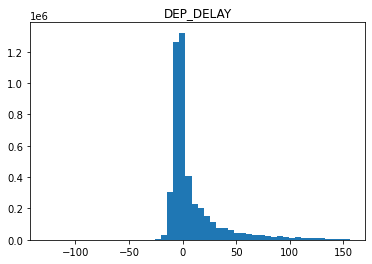

In [14]:
# flight_weather_df.hist(column='DEP_DELAY', bins =50, grid=False)

Most flights have none or minimal delays. So this distribution isn't surprising. The average flight is delayed by 9 minutes, with a fairly large standard deviation of 43 minutes. Looking at the 75th percentile, just 25% of flgiths had delays over 6 minutes.

Let's zoom in on those values.

In [19]:
# minimal = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 15, 'DEP_DELAY']
# one_std = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 45, 'DEP_DELAY']
# two_std = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 90, 'DEP_DELAY']
# three_std = flight_weather_df.loc[flight_weather_df['DEP_DELAY'] < 10000, 'DEP_DELAY']

# print(minimal.count())
# print(one_std.count()- minimal.count())
# print(two_std.count()-one_std.count())
# print(three_std.count()-two_std.count())

3600057
606125
282266
135898


It looks like even when we look at the most extreme 25% of delays, the average delay here is still 48 minutes with a standard deviation of 76 minutes.  Over 75% of the data falls under a 13 minute delay.

We'll construct our buckets as such:

* Neglibile delay (No delay or 15 minutes or less)
* Mild (Delay between 15 and 30 minutes)
* Moderate (Delay between 30 minutes and hour)
* Serious (Delay over an hour)
* Major (Delay over 2 hours)

In [14]:
# # Create a function to engineer this feature
# def delay_group(value):
#     """
#     Funtion takes in int or float and returns category of delay
#     """
#     if value <= 15:
#         return 'neglibile'
#     if value > 15 and value <= 60:
#         return 'moderate'
#     if value > 60:
#         return 'serious'
    
# flight_weather_df['delay_type'] = flight_weather_df['DEP_DELAY'].apply(delay_group)

# # Write the above DF to a CSV so we don't have to re-run all the code above
# flight_weather_df.to_csv('data/weather_flight_modeling_data.csv', index=False)

In [15]:
# flight_weather_df = pd.read_csv('data/weather_flight_modeling_data.csv')

In [16]:
# flight_weather_sample = flight_weather_df.sample(frac=0.02, axis=0, random_state=123)
# flight_weather_sample.to_csv('data/weather_flight_sample_data.csv', index=False)

In [2]:
flight_weather_df = pd.read_csv('data/weather_flight_sample_data.csv')

### Brining it all together

In [3]:
# Splitting features & target

y = flight_weather_df["delay_type"]
X = flight_weather_df.drop(["delay_type", "DEP_DELAY"], axis=1)

# Creating train, test and validation sets

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [4]:
num_cols = ['AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN', '1hop_AWND', '1hop_PRCP', '1hop_SNOW',
            '1hop_TMAX', '1hop_TMIN', '2hop_AWND', '2hop_PRCP', '2hop_SNOW', '2hop_TMAX',
            '2hop_TMIN', 'da_AWND', 'da_PRCP', 'da_SNOW', 'da_TMAX', 'da_TMIN', 'leg-1-distance',
            'leg-2-distance', 'leg-3-distance', 'leg-1-time-diff', 'leg-2-time-diff',
            'airport_1_hop_back_avg_flights_last_0_hours', 'airport_1_hop_back_avg_flights_last_1_hours',
            'airport_1_hop_back_avg_flights_last_3_hours', 'airport_1_hop_back_avg_flights_last_6_hours',
            'airport_1_hop_back_avg_flights_last_12_hours', 'airport_2_hop_back_avg_flights_last_0_hours',
            'airport_2_hop_back_avg_flights_last_1_hours', 'airport_2_hop_back_avg_flights_last_3_hours',
            'airport_2_hop_back_avg_flights_last_6_hours', 'airport_2_hop_back_avg_flights_last_12_hours',
            'takeoff-time-minutes-from-midnight', 'ELEVATION', 'SNWD', 'WDF2', 'WSF2', '1hop_ELEVATION',
            '1hop_SNWD', '1hop_WDF2', '1hop_WSF2', '2hop_ELEVATION', '2hop_SNWD', '2hop_WDF2', '2hop_WSF2',
            'da_ELEVATION', 'da_SNWD', 'da_WDF2', 'da_WSF2']

cat_cols = ['MONTH', 'DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST', 'airport_1_hop_back', 'airport_2_hop_back',
            'holiday', 'holiday_name', 'days-from-holiday', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08',
            '1hop_WT01', '1hop_WT02', '1hop_WT03', '1hop_WT04', '1hop_WT06', '1hop_WT08', '2hop_WT01', '2hop_WT02',
            '2hop_WT03', '2hop_WT04', '2hop_WT06', '2hop_WT08', 'da_WT01', 'da_WT02', 'da_WT03', 'da_WT04', 'da_WT06',
            'da_WT08']

In [5]:
# Training Data

X_train_num = X_train[num_cols].copy()
X_train_cat = X_train[cat_cols].copy()

# Poly Features
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train_num)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_num.index, columns=X_train_num.columns)

X_train_cat = X_train_cat.applymap(str)
cols = X_train_cat.columns

X_train_ohe = pd.get_dummies(X_train_cat,prefix=cols, drop_first=False)

preprocessed_data = pd.concat([X_train_ohe, X_train_scaled], axis=1)

n_features = preprocessed_data.shape[1]

# Test Data

X_valid_num = X_valid[num_cols].copy()
X_valid_cat = X_valid[cat_cols].copy()

X_valid_scaled = scaler.transform(X_valid_num)
X_valid_scaled = pd.DataFrame(X_valid_scaled, index=X_valid_num.index, columns=X_valid_num.columns)

X_valid_cat = X_valid_cat.applymap(str)
cols = X_valid_cat.columns
X_valid_ohe = pd.get_dummies(X_valid_cat,prefix=cols, drop_first=False)

preprocessed_val_data = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [9]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
# class weights dict

class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Class weight num dict
class_weights_num_dict = {0: class_weights_dict['moderate'],
                1: class_weights_dict['neglibile'],
                2: class_weights_dict['serious']}

# Sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
valid_sample_weights = compute_sample_weight(class_weight='balanced', y=y_valid)

# Labels for deep learning
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(y_train)
valid_labels = binarizer.fit_transform(y_valid)

## Modeling

### Helper Functions

In [10]:
def model_performance(pipe, X, y):
    
    scoring = ['accuracy','precision_micro', 'recall_micro', 'f1_micro']
    cv = cross_validate(pipe, X, y, return_train_score=True, scoring=scoring)
    
    # Printing Train & CV Scores
    
    print('Training Accuracy', round(cv['train_accuracy'].mean(),3))
    print('Cross Val Accuracy', round(cv['test_accuracy'].mean(),3))
    print('---')
    print('Training Precision:', round(cv['train_precision_micro'].mean(),3))
    print('Cross Val Precision:', round(cv['test_precision_micro'].mean(),3))
    print('---')
    print('Training Recall:', round(cv['train_recall_micro'].mean(),3))
    print('Cross Val Recall:', round(cv['test_recall_micro'].mean(),3))
    print('---')
    print('Training F1:', round(cv['train_f1_micro'].mean(),3))
    print('Cross Val F1:', round(cv['test_f1_micro'].mean(),3))
   
    # Plotting a confusion matrix
    plot_confusion_matrix(pipe, X, y, normalize='true')
    

# Function for plotting Loss & Accuracy
def visualize_training_results(hist):
    
    hist_dict = hist.history
    fig, ax = plt.subplots(figsize=(12, 8))

    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)
    ax.plot(epochs, loss_values, label='Training loss')
    ax.plot(epochs, val_loss_values, label='Validation loss')

    ax.set_title('Training & validation loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend();
    
    fig, ax = plt.subplots(figsize=(12, 8))

    acc_values = hist_dict['acc'] 
    val_acc_values = hist_dict['val_acc']

    ax.plot(epochs, acc_values, label='Training acc')
    ax.plot(epochs, val_acc_values, label='Validation acc')
    ax.set_title('Training & validation accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend();
    

def evaluate_results(model, x, y):
    """
    Describe the function -- inputs, expected output, what is model? what are x/y and expected formats
    """
    y_pred  = []
    y_true = []
    predictions = model.predict(x)
    
    for element in predictions:
        highest_odds = np.max(element)
        ind_get = np.where(element == highest_odds)
        ind = ind_get[0][0]
        if ind == 0:
            y_pred.append(0)
        elif ind == 1:
            y_pred.append(1)
        elif ind == 2:
            y_pred.append(2)
        else:
            y_pred.append(3)
        
    for element in y:
        highest_odds = np.max(element)
        ind_get = np.where(element == highest_odds)
        ind = ind_get[0][0]
        if ind == 0:
            y_true.append(0)
        elif ind == 1:
            y_true.append(1)
        elif ind == 2:
            y_true.append(2)
        else:
            y_true.append(3)
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    
#     accuracy = accuracy_score(y_true, y_pred)
#     print('Accuracy: %f' % accuracy)
#     # precision tp / (tp + fp)
#     precision = precision_score(y_true, y_pred)
#     print('Precision: %f' % precision)
#     # recall: tp / (tp + fn)
#     recall = recall_score(y_true, y_pred)
#     print('Recall: %f' % recall)
#     # f1: 2 tp / (2 tp + fp + fn)
#     f1 = f1_score(y_true, y_pred)
#     print('F1 score: %f' % f1)

### Gradient Descent

#### Logistic Regression

C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Training Accuracy 0.793
Cross Val Accuracy 0.777
---
Training Precision: 0.793
Cross Val Precision: 0.777
---
Training Recall: 0.793
Cross Val Recall: 0.777
---
Training F1: 0.793
Cross Val F1: 0.777


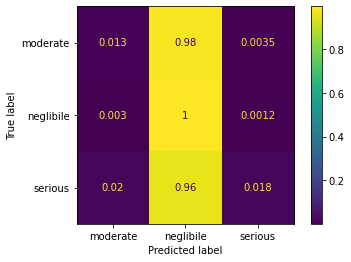

In [38]:
baselline_pipe = Pipeline(steps=[
    ('lr', LogisticRegression(random_state=123))
])

baselline_pipe.fit(preprocessed_data, y_train)

model_performance(baselline_pipe, preprocessed_val_data, y_valid)

C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Training Accuracy 0.545
Cross Val Accuracy 0.478
---
Training Precision: 0.545
Cross Val Precision: 0.478
---
Training Recall: 0.545
Cross Val Recall: 0.478
---
Training F1: 0.545
Cross Val F1: 0.478


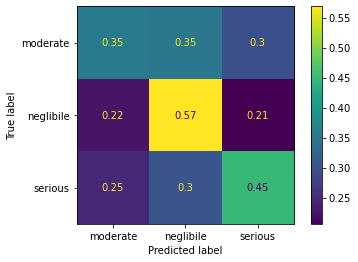

In [17]:
lr_pipe = Pipeline(steps=[
    ('lr', LogisticRegression(class_weight=class_weights_dict, random_state=123))
])

lr_pipe.fit(preprocessed_data, y_train)

model_performance(lr_pipe, preprocessed_val_data, y_valid)

C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Robert\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Accuracy 0.548
Cross Val Accuracy 0.482
---
Training Precision: 0.548
Cross Val Precision: 0.482
---
Training Recall: 0.548
Cross Val Recall: 0.482
---
Training F1: 0.548
Cross Val F1: 0.482


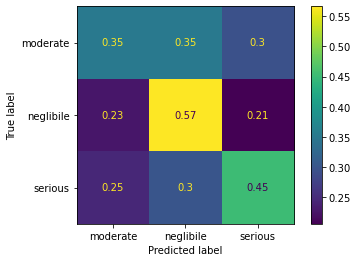

In [30]:
lr_pipe2 = Pipeline(steps=[
    ('lr', LogisticRegression(class_weight='balanced', max_iter = 1000, solver = 'saga', random_state=123))
])

lr_pipe2.fit(preprocessed_data, y_train)

model_performance(lr_pipe2, preprocessed_val_data, y_valid)

#### Random Forest

Training Accuracy 0.986
Cross Val Accuracy 0.778
---
Training Precision: 0.986
Cross Val Precision: 0.778
---
Training Recall: 0.986
Cross Val Recall: 0.778
---
Training F1: 0.986
Cross Val F1: 0.778


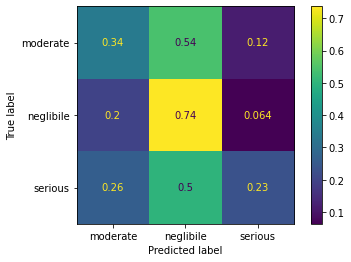

In [18]:
rf_pipe = Pipeline(steps=[
    ('rf', RandomForestClassifier(n_estimators=100,
                                  max_depth=12,
                                  class_weight=class_weights_dict,
                                  random_state=123))
])

rf_pipe.fit(preprocessed_data, y_train)

model_performance(rf_pipe, preprocessed_val_data, y_valid)

#### XGBoost

Training Accuracy 0.985
Cross Val Accuracy 0.779
---
Training Precision: 0.985
Cross Val Precision: 0.779
---
Training Recall: 0.985
Cross Val Recall: 0.779
---
Training F1: 0.985
Cross Val F1: 0.779


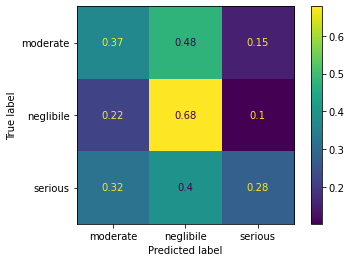

In [19]:
xgb_pipe = Pipeline([
    ('my_xgb_clf', xgb.XGBClassifier()),
])

xgb_pipe.fit(preprocessed_data, y_train, my_xgb_clf__sample_weight=sample_weights)

model_performance(xgb_pipe, preprocessed_val_data, y_valid)

Training Accuracy 0.787
Cross Val Accuracy 0.787
---
Training Precision: 0.787
Cross Val Precision: 0.787
---
Training Recall: 0.787
Cross Val Recall: 0.787
---
Training F1: 0.787
Cross Val F1: 0.787


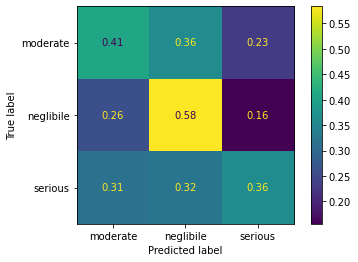

In [20]:
xgb_pipe2 = Pipeline([
    ('my_xgb_clf', xgb.XGBClassifier(subsample=0.4, max_depth=15, alpha = 100))
])

xgb_pipe2.fit(preprocessed_data,
              y_train,
              my_xgb_clf__sample_weight=sample_weights)

model_performance(xgb_pipe2, preprocessed_val_data, y_valid)

Training Accuracy 0.787
Cross Val Accuracy 0.787
---
Training Precision: 0.787
Cross Val Precision: 0.787
---
Training Recall: 0.787
Cross Val Recall: 0.787
---
Training F1: 0.787
Cross Val F1: 0.787


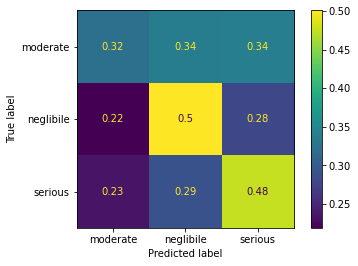

In [21]:
# best so far 
xgb_pipe3 = Pipeline([
    ('my_xgb_clf', xgb.XGBClassifier(colsample_bytree=0.4,
                                     subsample=0.1,
                                     max_depth=15,
                                     gamma=0.1,
                                     eta=0.15,
                                     min_child_weight=1000))
])

xgb_pipe3.fit(preprocessed_data,
              y_train,
              my_xgb_clf__sample_weight=sample_weights)

model_performance(xgb_pipe3, preprocessed_val_data, y_valid)

Training Accuracy 0.787
Cross Val Accuracy 0.787
---
Training Precision: 0.787
Cross Val Precision: 0.787
---
Training Recall: 0.787
Cross Val Recall: 0.787
---
Training F1: 0.787
Cross Val F1: 0.787


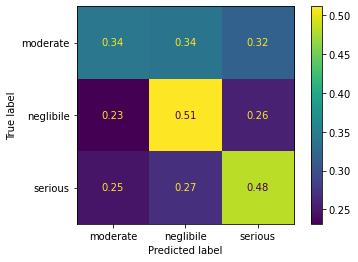

In [22]:
xgb_pipe4 = Pipeline([
    ('my_xgb_clf', xgb.XGBClassifier(colsample_bytree=0.3,
                                     subsample=0.1,
                                     max_depth=30,
                                     gamma=0.1,
                                     eta=0.25,
                                     min_child_weight=800))
])

xgb_pipe4.fit(preprocessed_data,
              y_train,
              my_xgb_clf__sample_weight=sample_weights)

model_performance(xgb_pipe4, preprocessed_val_data, y_valid)

In [45]:
# Optimized XGBoost Classifier

kwargs = {xgb_pipe.steps[-1][0] + '__sample_weight': sample_weights}

xgb_pipe = Pipeline(steps=[
    ('xg', XGBClassifier(**kwargs))
])


xgb_grid_search = {
    'xg__learning_rate': [0.001, 0.01, 0.1],
    'xg__max_depth': [15, 30, 50],
    'xg__min_child_weight': [1, 100, 500, 1000]
}

xgb_gridsearch = GridSearchCV(estimator=xgb_pipe, 
                          param_grid=xgb_grid_search,
                          scoring='f1_micro')

# Fit the training data
xgb_gridsearch.fit(preprocessed_data,
                   y_train)

# Print the recall on test set and best params
print(xgb_gridsearch.best_params_)

[13:48:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[14:08:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:10:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:13:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[14:38:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:41:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:45:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[15:07:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[15:32:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:34:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[16:06:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:07:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:08:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[16:25:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:26:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:27:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[16:48:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:49:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:51:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

[17:16:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { xg__sample_weight } might not be used.

  This may not be accurate due to some parameters are 

Training Accuracy 0.787
Cross Val Accuracy 0.787
---
Training Precision: 0.787
Cross Val Precision: 0.787
---
Training Recall: 0.787
Cross Val Recall: 0.787
---
Training F1: 0.787
Cross Val F1: 0.787


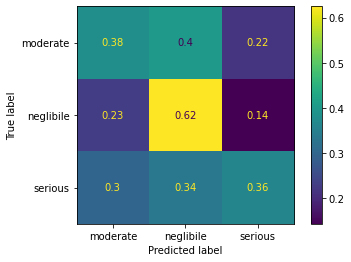

In [46]:
xgb_pipe6 = Pipeline([
    ('my_xgb_clf', xgb.XGBClassifier(learning_rate= 0.01,
                                     max_depth = 15,
                                    min_child_weight = 100))
])

xgb_pipe6.fit(preprocessed_data,
              y_train,
              my_xgb_clf__sample_weight=sample_weights)

model_performance(xgb_pipe6, preprocessed_val_data, y_valid)

#### LightGBM

Training Accuracy 0.659
Cross Val Accuracy 0.552
---
Training Precision: 0.659
Cross Val Precision: 0.552
---
Training Recall: 0.659
Cross Val Recall: 0.552
---
Training F1: 0.659
Cross Val F1: 0.552


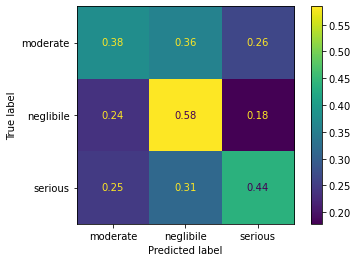

In [24]:
light_gbm_pipe2 = Pipeline([
    ('lightgbm_clf', LGBMClassifier(max_depth = 8, learning_rate = 0.01, class_weight='balanced'))])

light_gbm_pipe2.fit(preprocessed_data, y_train)

model_performance(light_gbm_pipe2, preprocessed_val_data, y_valid)

Training Accuracy 0.572
Cross Val Accuracy 0.501
---
Training Precision: 0.572
Cross Val Precision: 0.501
---
Training Recall: 0.572
Cross Val Recall: 0.501
---
Training F1: 0.572
Cross Val F1: 0.501


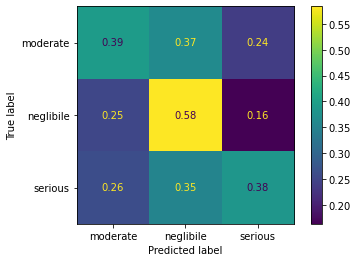

In [25]:
light_gbm_pipe3 = Pipeline([
    ('lightgbm_clf', LGBMClassifier(max_depth = 8, learning_rate = 0.001, class_weight='balanced'))])

light_gbm_pipe3.fit(preprocessed_data, y_train)

model_performance(light_gbm_pipe3, preprocessed_val_data, y_valid)

Training Accuracy 0.606
Cross Val Accuracy 0.527
---
Training Precision: 0.606
Cross Val Precision: 0.527
---
Training Recall: 0.606
Cross Val Recall: 0.527
---
Training F1: 0.606
Cross Val F1: 0.527


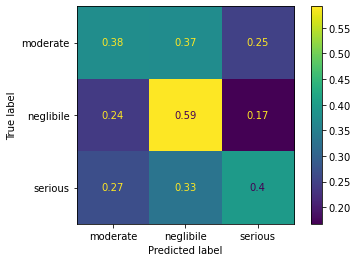

In [26]:
light_gbm_pipe4 = Pipeline([
    ('lightgbm_clf', LGBMClassifier(objective = 'multiclass',
                                    boosting_type ='dart',
                                    n_estimators = 1000, 
                                    max_depth = 8,
                                    learning_rate = 0.001,
                                    class_weight='balanced'))])

light_gbm_pipe4.fit(preprocessed_data, y_train)

model_performance(light_gbm_pipe4, preprocessed_val_data, y_valid)

Learning rate set to 0.5
0:	learn: 1.0737353	total: 19.3ms	remaining: 1.91s
1:	learn: 1.0608016	total: 37.5ms	remaining: 1.84s
2:	learn: 1.0518377	total: 54ms	remaining: 1.75s
3:	learn: 1.0470361	total: 72.7ms	remaining: 1.75s
4:	learn: 1.0430117	total: 89.7ms	remaining: 1.71s
5:	learn: 1.0391519	total: 108ms	remaining: 1.69s
6:	learn: 1.0362673	total: 123ms	remaining: 1.64s
7:	learn: 1.0333856	total: 141ms	remaining: 1.62s
8:	learn: 1.0311122	total: 157ms	remaining: 1.59s
9:	learn: 1.0282517	total: 175ms	remaining: 1.58s
10:	learn: 1.0258703	total: 194ms	remaining: 1.57s
11:	learn: 1.0243495	total: 211ms	remaining: 1.55s
12:	learn: 1.0228780	total: 229ms	remaining: 1.53s
13:	learn: 1.0203150	total: 246ms	remaining: 1.51s
14:	learn: 1.0184397	total: 263ms	remaining: 1.49s
15:	learn: 1.0166437	total: 281ms	remaining: 1.47s
16:	learn: 1.0153432	total: 296ms	remaining: 1.45s
17:	learn: 1.0140529	total: 312ms	remaining: 1.42s
18:	learn: 1.0116811	total: 330ms	remaining: 1.4s
19:	learn: 1.0

70:	learn: 0.5114649	total: 543ms	remaining: 222ms
71:	learn: 0.5082981	total: 551ms	remaining: 214ms
72:	learn: 0.5029800	total: 559ms	remaining: 207ms
73:	learn: 0.5000453	total: 566ms	remaining: 199ms
74:	learn: 0.4962799	total: 573ms	remaining: 191ms
75:	learn: 0.4907229	total: 580ms	remaining: 183ms
76:	learn: 0.4849760	total: 587ms	remaining: 175ms
77:	learn: 0.4813318	total: 594ms	remaining: 167ms
78:	learn: 0.4767001	total: 601ms	remaining: 160ms
79:	learn: 0.4724540	total: 608ms	remaining: 152ms
80:	learn: 0.4678183	total: 615ms	remaining: 144ms
81:	learn: 0.4663045	total: 622ms	remaining: 137ms
82:	learn: 0.4624117	total: 630ms	remaining: 129ms
83:	learn: 0.4574821	total: 636ms	remaining: 121ms
84:	learn: 0.4538963	total: 644ms	remaining: 114ms
85:	learn: 0.4501459	total: 651ms	remaining: 106ms
86:	learn: 0.4463570	total: 658ms	remaining: 98.4ms
87:	learn: 0.4413697	total: 665ms	remaining: 90.7ms
88:	learn: 0.4380368	total: 673ms	remaining: 83.1ms
89:	learn: 0.4358564	total: 

47:	learn: 0.6454773	total: 360ms	remaining: 390ms
48:	learn: 0.6401301	total: 367ms	remaining: 382ms
49:	learn: 0.6346277	total: 375ms	remaining: 375ms
50:	learn: 0.6316173	total: 382ms	remaining: 367ms
51:	learn: 0.6252431	total: 389ms	remaining: 359ms
52:	learn: 0.6188629	total: 396ms	remaining: 351ms
53:	learn: 0.6146516	total: 403ms	remaining: 344ms
54:	learn: 0.6087952	total: 410ms	remaining: 336ms
55:	learn: 0.6047104	total: 417ms	remaining: 328ms
56:	learn: 0.5994560	total: 424ms	remaining: 320ms
57:	learn: 0.5928658	total: 431ms	remaining: 312ms
58:	learn: 0.5874307	total: 439ms	remaining: 305ms
59:	learn: 0.5825046	total: 446ms	remaining: 297ms
60:	learn: 0.5754675	total: 454ms	remaining: 290ms
61:	learn: 0.5707198	total: 461ms	remaining: 283ms
62:	learn: 0.5666631	total: 469ms	remaining: 275ms
63:	learn: 0.5613818	total: 476ms	remaining: 268ms
64:	learn: 0.5575114	total: 484ms	remaining: 260ms
65:	learn: 0.5527472	total: 491ms	remaining: 253ms
66:	learn: 0.5494397	total: 498

24:	learn: 0.8285083	total: 187ms	remaining: 560ms
25:	learn: 0.8174551	total: 195ms	remaining: 554ms
26:	learn: 0.8114088	total: 203ms	remaining: 548ms
27:	learn: 0.8031480	total: 211ms	remaining: 542ms
28:	learn: 0.7929158	total: 219ms	remaining: 536ms
29:	learn: 0.7793682	total: 227ms	remaining: 529ms
30:	learn: 0.7723951	total: 235ms	remaining: 523ms
31:	learn: 0.7639275	total: 242ms	remaining: 515ms
32:	learn: 0.7544578	total: 250ms	remaining: 507ms
33:	learn: 0.7469609	total: 258ms	remaining: 501ms
34:	learn: 0.7306926	total: 266ms	remaining: 494ms
35:	learn: 0.7226722	total: 274ms	remaining: 486ms
36:	learn: 0.7138839	total: 281ms	remaining: 479ms
37:	learn: 0.7077749	total: 289ms	remaining: 471ms
38:	learn: 0.7012250	total: 296ms	remaining: 464ms
39:	learn: 0.6964316	total: 304ms	remaining: 456ms
40:	learn: 0.6872988	total: 311ms	remaining: 448ms
41:	learn: 0.6810338	total: 319ms	remaining: 441ms
42:	learn: 0.6752278	total: 326ms	remaining: 432ms
43:	learn: 0.6699218	total: 333

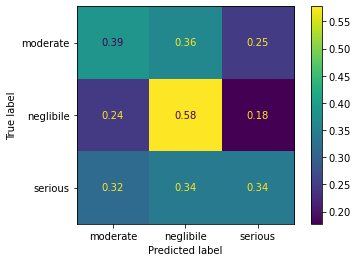

In [36]:
from catboost import CatBoostClassifier

catboost_pipe = Pipeline([
    ('catboost_clf', CatBoostClassifier(iterations=100,
                           depth=6,
                           class_weights = class_weights_dict))])

catboost_pipe.fit(preprocessed_data, y_train)

model_performance(catboost_pipe, preprocessed_val_data, y_valid)

### Deep Learning Models

In [35]:
model_1 = Sequential()
model_1.add(Dense(800, activation='relu', input_dim=n_features))
model_1.add(Dense(600, activation='relu'))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dense(150, activation='relu'))
model_1.add(Dense(75, activation='relu'))
model_1.add(Dense(4, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
results_1 = model_1.fit(preprocessed_data, labels,
                        class_weight=class_weights_num_dict,
                        epochs=25, batch_size=32,
                        validation_split=0.2)

Epoch 1/25
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3685 - acc: 0.4785 - val_loss: 1.4317 - val_acc: 0.4312
Epoch 2/25
1850/1850 [==============================] - 11s 6ms/step - loss: 1.3450 - acc: 0.5064 - val_loss: 1.2439 - val_acc: 0.5280
Epoch 3/25
1850/1850 [==============================] - 11s 6ms/step - loss: 1.3254 - acc: 0.5086 - val_loss: 1.3112 - val_acc: 0.5164
Epoch 4/25
1850/1850 [==============================] - 11s 6ms/step - loss: 1.2956 - acc: 0.5056 - val_loss: 1.4522 - val_acc: 0.4067
Epoch 5/25
1850/1850 [==============================] - 11s 6ms/step - loss: 1.2448 - acc: 0.5297 - val_loss: 1.3285 - val_acc: 0.4918
Epoch 6/25
1850/1850 [==============================] - 11s 6ms/step - loss: 1.1767 - acc: 0.5228 - val_loss: 1.2402 - val_acc: 0.4960
Epoch 7/25
1850/1850 [==============================] - 11s 6ms/step - loss: 1.0720 - acc: 0.5152 - val_loss: 1.2152 - val_acc: 0.4886
Epoch 8/25
1850/1850 [==============================] -

290/290 [==============================] - 1s 2ms/step


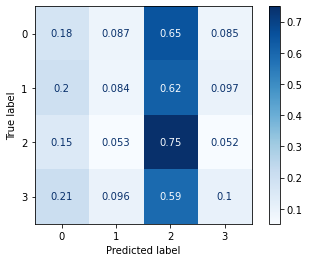

In [104]:
evaluate_results(model_1, preprocessed_val_data, valid_labels)
visualize_training_results(results_1)

In [106]:
model_3 = Sequential()
model_3.add(Dense(800, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.005), activation='relu', input_shape=(n_features,)))
model_3.add(Dense(700, activation='relu'))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dense(150, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model_3.add(Dense(75, activation='relu'))
model_3.add(Dense(4, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model_3_hist = model_3.fit(preprocessed_data,
                           labels,
                           class_weight=class_weights_num_dict,
                           epochs=1000,
                           batch_size=32,
                           validation_split=0.2)

Epoch 1/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.6788 - acc: 0.4724 - val_loss: 1.3350 - val_acc: 0.5656
Epoch 2/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3735 - acc: 0.5143 - val_loss: 1.2927 - val_acc: 0.5637
Epoch 3/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3647 - acc: 0.5123 - val_loss: 1.2509 - val_acc: 0.5467
Epoch 4/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3616 - acc: 0.4871 - val_loss: 1.2562 - val_acc: 0.5615
Epoch 5/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3589 - acc: 0.5083 - val_loss: 1.3413 - val_acc: 0.4480
Epoch 6/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3578 - acc: 0.4968 - val_loss: 1.4656 - val_acc: 0.3096
Epoch 7/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3554 - acc: 0.5102 - val_loss: 1.3666 - val_acc: 0.4239
Epoch 8/1000
1850/1850 [=================

1850/1850 [==============================] - 12s 6ms/step - loss: 1.3515 - acc: 0.5104 - val_loss: 1.3067 - val_acc: 0.4964
Epoch 61/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3494 - acc: 0.5070 - val_loss: 1.3571 - val_acc: 0.4527
Epoch 62/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3501 - acc: 0.5052 - val_loss: 1.4002 - val_acc: 0.4062
Epoch 63/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3500 - acc: 0.5027 - val_loss: 1.2799 - val_acc: 0.5287
Epoch 64/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3499 - acc: 0.4983 - val_loss: 1.2274 - val_acc: 0.5771
Epoch 65/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3505 - acc: 0.5097 - val_loss: 1.3650 - val_acc: 0.4703
Epoch 66/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3504 - acc: 0.4997 - val_loss: 1.3757 - val_acc: 0.4306
Epoch 67/1000
1850/1850 [=======================

1850/1850 [==============================] - 12s 6ms/step - loss: 1.3508 - acc: 0.5082 - val_loss: 1.4436 - val_acc: 0.3357
Epoch 120/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3519 - acc: 0.4941 - val_loss: 1.3225 - val_acc: 0.4722
Epoch 121/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3518 - acc: 0.4961 - val_loss: 1.3058 - val_acc: 0.5098
Epoch 122/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3511 - acc: 0.5010 - val_loss: 1.3347 - val_acc: 0.4540
Epoch 123/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3509 - acc: 0.4913 - val_loss: 1.3189 - val_acc: 0.4976
Epoch 124/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3502 - acc: 0.5027 - val_loss: 1.2827 - val_acc: 0.5090
Epoch 125/1000
1850/1850 [==============================] - 12s 6ms/step - loss: 1.3494 - acc: 0.5002 - val_loss: 1.3451 - val_acc: 0.4710
Epoch 126/1000
1850/1850 [================

1850/1850 [==============================] - 12s 7ms/step - loss: 1.3501 - acc: 0.4946 - val_loss: 1.2650 - val_acc: 0.5218
Epoch 179/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3496 - acc: 0.4987 - val_loss: 1.3628 - val_acc: 0.4371
Epoch 180/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3499 - acc: 0.4974 - val_loss: 1.2364 - val_acc: 0.5637
Epoch 181/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3493 - acc: 0.5012 - val_loss: 1.2758 - val_acc: 0.5477
Epoch 182/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3498 - acc: 0.5014 - val_loss: 1.2230 - val_acc: 0.5711
Epoch 183/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3493 - acc: 0.5004 - val_loss: 1.2482 - val_acc: 0.5686
Epoch 184/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3498 - acc: 0.5142 - val_loss: 1.2476 - val_acc: 0.5535
Epoch 185/1000
1850/1850 [================

1850/1850 [==============================] - 12s 7ms/step - loss: 1.3502 - acc: 0.4997 - val_loss: 1.3324 - val_acc: 0.4522
Epoch 238/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3506 - acc: 0.4985 - val_loss: 1.2668 - val_acc: 0.5411
Epoch 239/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3495 - acc: 0.4960 - val_loss: 1.2768 - val_acc: 0.5306
Epoch 240/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3501 - acc: 0.4907 - val_loss: 1.3221 - val_acc: 0.4703
Epoch 241/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3494 - acc: 0.4987 - val_loss: 1.3440 - val_acc: 0.4536
Epoch 242/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3504 - acc: 0.5010 - val_loss: 1.4427 - val_acc: 0.3612
Epoch 243/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3512 - acc: 0.4965 - val_loss: 1.3200 - val_acc: 0.4751
Epoch 244/1000
1850/1850 [================

1850/1850 [==============================] - 12s 7ms/step - loss: 1.3498 - acc: 0.5050 - val_loss: 1.2477 - val_acc: 0.5524
Epoch 297/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3511 - acc: 0.5043 - val_loss: 1.2335 - val_acc: 0.5749
Epoch 298/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3517 - acc: 0.5088 - val_loss: 1.2282 - val_acc: 0.5763
Epoch 299/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3505 - acc: 0.5074 - val_loss: 1.2927 - val_acc: 0.5388
Epoch 300/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3501 - acc: 0.5068 - val_loss: 1.3886 - val_acc: 0.4264
Epoch 301/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3502 - acc: 0.5079 - val_loss: 1.3019 - val_acc: 0.5212
Epoch 302/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3503 - acc: 0.5029 - val_loss: 1.4030 - val_acc: 0.4191
Epoch 303/1000
1850/1850 [================

1850/1850 [==============================] - 13s 7ms/step - loss: 1.3505 - acc: 0.5044 - val_loss: 1.3004 - val_acc: 0.5215
Epoch 356/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3510 - acc: 0.5038 - val_loss: 1.3322 - val_acc: 0.4903
Epoch 357/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3496 - acc: 0.5084 - val_loss: 1.2081 - val_acc: 0.5972
Epoch 358/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3505 - acc: 0.5071 - val_loss: 1.3590 - val_acc: 0.4413
Epoch 359/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3506 - acc: 0.4990 - val_loss: 1.3626 - val_acc: 0.4349
Epoch 360/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3494 - acc: 0.5049 - val_loss: 1.2464 - val_acc: 0.5552
Epoch 361/1000
1850/1850 [==============================] - 12s 7ms/step - loss: 1.3496 - acc: 0.4985 - val_loss: 1.3092 - val_acc: 0.5030
Epoch 362/1000
1850/1850 [================

1850/1850 [==============================] - 13s 7ms/step - loss: 1.3512 - acc: 0.4923 - val_loss: 1.2705 - val_acc: 0.5382
Epoch 415/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3505 - acc: 0.5032 - val_loss: 1.3795 - val_acc: 0.4297
Epoch 416/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3512 - acc: 0.5036 - val_loss: 1.3851 - val_acc: 0.4177
Epoch 417/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3506 - acc: 0.4953 - val_loss: 1.1374 - val_acc: 0.6627
Epoch 418/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3504 - acc: 0.5043 - val_loss: 1.2857 - val_acc: 0.5190
Epoch 419/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3500 - acc: 0.4974 - val_loss: 1.2421 - val_acc: 0.5651
Epoch 420/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3506 - acc: 0.4965 - val_loss: 1.2571 - val_acc: 0.5428
Epoch 421/1000
1850/1850 [================

1850/1850 [==============================] - 13s 7ms/step - loss: 1.3511 - acc: 0.5038 - val_loss: 1.2104 - val_acc: 0.5945
Epoch 474/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3503 - acc: 0.5006 - val_loss: 1.3796 - val_acc: 0.4097
Epoch 475/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3511 - acc: 0.4929 - val_loss: 1.4015 - val_acc: 0.4167
Epoch 476/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3505 - acc: 0.5092 - val_loss: 1.3656 - val_acc: 0.4401
Epoch 477/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3496 - acc: 0.5025 - val_loss: 1.3258 - val_acc: 0.4847
Epoch 478/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3503 - acc: 0.5004 - val_loss: 1.3007 - val_acc: 0.5114
Epoch 479/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3514 - acc: 0.5015 - val_loss: 1.2968 - val_acc: 0.5154
Epoch 480/1000
1850/1850 [================

1850/1850 [==============================] - 14s 7ms/step - loss: 1.3506 - acc: 0.5027 - val_loss: 1.2424 - val_acc: 0.5695
Epoch 533/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3502 - acc: 0.5035 - val_loss: 1.1992 - val_acc: 0.6068
Epoch 534/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3506 - acc: 0.5042 - val_loss: 1.2453 - val_acc: 0.5668
Epoch 535/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3500 - acc: 0.5023 - val_loss: 1.3136 - val_acc: 0.4904
Epoch 536/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3509 - acc: 0.4996 - val_loss: 1.3681 - val_acc: 0.4405
Epoch 537/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3503 - acc: 0.5093 - val_loss: 1.4409 - val_acc: 0.3519
Epoch 538/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3499 - acc: 0.5053 - val_loss: 1.3148 - val_acc: 0.4887
Epoch 539/1000
1850/1850 [================

1850/1850 [==============================] - 13s 7ms/step - loss: 1.3510 - acc: 0.4996 - val_loss: 1.2903 - val_acc: 0.5151
Epoch 592/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3508 - acc: 0.4962 - val_loss: 1.2205 - val_acc: 0.5914
Epoch 593/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3502 - acc: 0.4998 - val_loss: 1.4205 - val_acc: 0.3780
Epoch 594/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3504 - acc: 0.5034 - val_loss: 1.3318 - val_acc: 0.4679
Epoch 595/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3503 - acc: 0.4973 - val_loss: 1.2354 - val_acc: 0.5530
Epoch 596/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3506 - acc: 0.4978 - val_loss: 1.3262 - val_acc: 0.4668
Epoch 597/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3505 - acc: 0.4933 - val_loss: 1.3186 - val_acc: 0.4755
Epoch 598/1000
1850/1850 [================

1850/1850 [==============================] - 14s 7ms/step - loss: 1.3508 - acc: 0.5005 - val_loss: 1.3259 - val_acc: 0.4713
Epoch 651/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3520 - acc: 0.5007 - val_loss: 1.3109 - val_acc: 0.4836
Epoch 652/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3494 - acc: 0.5074 - val_loss: 1.2192 - val_acc: 0.5780
Epoch 653/1000
1850/1850 [==============================] - 13s 7ms/step - loss: 1.3502 - acc: 0.4966 - val_loss: 1.2992 - val_acc: 0.4922
Epoch 654/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3506 - acc: 0.4938 - val_loss: 1.3317 - val_acc: 0.4759
Epoch 655/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3509 - acc: 0.4993 - val_loss: 1.2875 - val_acc: 0.5166
Epoch 656/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3510 - acc: 0.4996 - val_loss: 1.2780 - val_acc: 0.5178
Epoch 657/1000
1850/1850 [================

Epoch 709/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3489 - acc: 0.5059 - val_loss: 1.3184 - val_acc: 0.4755
Epoch 710/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3501 - acc: 0.5000 - val_loss: 1.2102 - val_acc: 0.5917
Epoch 711/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3496 - acc: 0.5045 - val_loss: 1.2876 - val_acc: 0.5172
Epoch 712/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3498 - acc: 0.5016 - val_loss: 1.2779 - val_acc: 0.5157
Epoch 713/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3500 - acc: 0.4940 - val_loss: 1.3291 - val_acc: 0.4749
Epoch 714/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3502 - acc: 0.5010 - val_loss: 1.2653 - val_acc: 0.5463
Epoch 715/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3498 - acc: 0.5019 - val_loss: 1.4307 - val_acc: 0.3671
Epoch 716/1000
1850/1850 [=

Epoch 768/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3494 - acc: 0.5001 - val_loss: 1.4656 - val_acc: 0.3271
Epoch 769/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3516 - acc: 0.4864 - val_loss: 1.2848 - val_acc: 0.5107
Epoch 770/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3512 - acc: 0.4939 - val_loss: 1.3448 - val_acc: 0.4513
Epoch 771/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3524 - acc: 0.4958 - val_loss: 1.2174 - val_acc: 0.5865
Epoch 772/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3503 - acc: 0.4996 - val_loss: 1.2726 - val_acc: 0.5457
Epoch 773/1000
1850/1850 [==============================] - 14s 7ms/step - loss: 1.3505 - acc: 0.5025 - val_loss: 1.2412 - val_acc: 0.5704
Epoch 774/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3507 - acc: 0.4999 - val_loss: 1.3428 - val_acc: 0.4551
Epoch 775/1000
1850/1850 [=

Epoch 827/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3501 - acc: 0.4907 - val_loss: 1.4120 - val_acc: 0.3705
Epoch 828/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3500 - acc: 0.4940 - val_loss: 1.3476 - val_acc: 0.4668
Epoch 829/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3506 - acc: 0.4819 - val_loss: 1.4329 - val_acc: 0.3803
Epoch 830/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3513 - acc: 0.4956 - val_loss: 1.2663 - val_acc: 0.5124
Epoch 831/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3509 - acc: 0.4858 - val_loss: 1.2668 - val_acc: 0.5293
Epoch 832/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3496 - acc: 0.4928 - val_loss: 1.2784 - val_acc: 0.5113
Epoch 833/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3499 - acc: 0.4921 - val_loss: 1.2814 - val_acc: 0.4974
Epoch 834/1000
1850/1850 [=

Epoch 886/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3505 - acc: 0.5048 - val_loss: 1.3293 - val_acc: 0.4816
Epoch 887/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3491 - acc: 0.5082 - val_loss: 1.4343 - val_acc: 0.3607
Epoch 888/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3501 - acc: 0.4905 - val_loss: 1.2357 - val_acc: 0.5599
Epoch 889/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3527 - acc: 0.4895 - val_loss: 1.4295 - val_acc: 0.3697
Epoch 890/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3514 - acc: 0.4979 - val_loss: 1.3799 - val_acc: 0.4282
Epoch 891/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3519 - acc: 0.5034 - val_loss: 1.4298 - val_acc: 0.4004
Epoch 892/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3527 - acc: 0.4976 - val_loss: 1.2919 - val_acc: 0.5090
Epoch 893/1000
1850/1850 [=

Epoch 945/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3500 - acc: 0.5068 - val_loss: 1.3826 - val_acc: 0.4196
Epoch 946/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3491 - acc: 0.5085 - val_loss: 1.3119 - val_acc: 0.4931
Epoch 947/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3501 - acc: 0.5013 - val_loss: 1.4091 - val_acc: 0.3981
Epoch 948/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3496 - acc: 0.5036 - val_loss: 1.3594 - val_acc: 0.4294
Epoch 949/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.3488 - acc: 0.4949 - val_loss: 1.3416 - val_acc: 0.4663
Epoch 950/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3496 - acc: 0.4992 - val_loss: 1.4559 - val_acc: 0.3292
Epoch 951/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.3512 - acc: 0.4886 - val_loss: 1.2176 - val_acc: 0.5724
Epoch 952/1000
1850/1850 [=

290/290 [==============================] - 1s 3ms/step


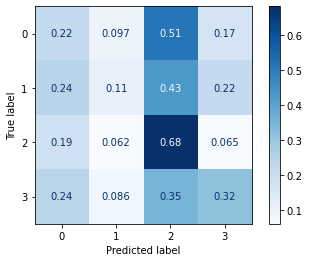

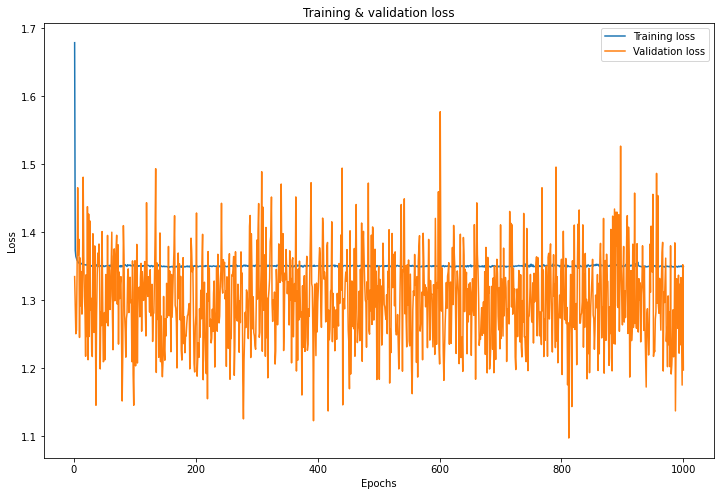

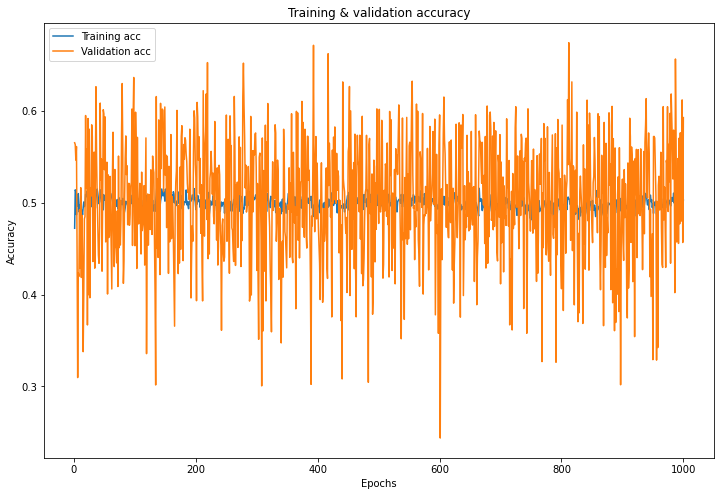

In [107]:
evaluate_results(model_3, preprocessed_val_data, valid_labels)
visualize_training_results(model_3_hist)

In [108]:
model_5 = Sequential()
model_5.add(Dense(800, kernel_initializer='lecun_normal', kernel_regularizer=regularizers.l2(0.005), activation='relu', input_shape=(n_features,)))
model_5.add(Dense(700, activation='relu'))
model_5.add(Dense(300, activation='relu'))
model_5.add(Dense(150, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model_5.add(Dense(75, activation='relu'))
model_5.add(Dense(4, activation='softmax'))

model_5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])

model_5_hist = model_5.fit(preprocessed_data,
                           labels,
                           class_weight=class_weights_num_dict,
                           epochs=1000,
                           batch_size=32,
                           validation_split=0.2)

Epoch 1/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 5.5393 - acc: 0.4177 - val_loss: 4.8509 - val_acc: 0.4241
Epoch 2/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 4.2264 - acc: 0.5119 - val_loss: 3.7013 - val_acc: 0.5084
Epoch 3/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 3.3272 - acc: 0.5076 - val_loss: 3.0301 - val_acc: 0.3536
Epoch 4/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 2.7077 - acc: 0.5050 - val_loss: 2.4095 - val_acc: 0.5071
Epoch 5/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 2.2797 - acc: 0.5042 - val_loss: 2.0239 - val_acc: 0.5414
Epoch 6/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.9847 - acc: 0.5000 - val_loss: 2.0371 - val_acc: 0.3387
Epoch 7/1000
1850/1850 [==============================] - 14s 8ms/step - loss: 1.7823 - acc: 0.4955 - val_loss: 1.6785 - val_acc: 0.4890
Epoch 8/1000
1850/1850 [=================

1850/1850 [==============================] - 15s 8ms/step - loss: 1.0893 - acc: 0.5459 - val_loss: 1.6888 - val_acc: 0.4284
Epoch 61/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.0724 - acc: 0.5535 - val_loss: 1.7043 - val_acc: 0.4809
Epoch 62/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.0638 - acc: 0.5558 - val_loss: 1.6720 - val_acc: 0.4529
Epoch 63/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.0971 - acc: 0.5455 - val_loss: 1.7168 - val_acc: 0.4534
Epoch 64/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.0729 - acc: 0.5567 - val_loss: 1.6917 - val_acc: 0.4274
Epoch 65/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.0655 - acc: 0.5594 - val_loss: 2.0872 - val_acc: 0.2703
Epoch 66/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 1.0542 - acc: 0.5645 - val_loss: 1.7537 - val_acc: 0.4422
Epoch 67/1000
1850/1850 [=======================

1850/1850 [==============================] - 15s 8ms/step - loss: 0.7091 - acc: 0.7541 - val_loss: 1.9832 - val_acc: 0.4193
Epoch 120/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.7996 - acc: 0.7043 - val_loss: 1.7308 - val_acc: 0.5101
Epoch 121/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.8108 - acc: 0.7091 - val_loss: 1.7672 - val_acc: 0.5305
Epoch 122/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.6988 - acc: 0.7654 - val_loss: 1.8275 - val_acc: 0.5310
Epoch 123/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.7242 - acc: 0.7494 - val_loss: 1.8523 - val_acc: 0.5053
Epoch 124/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.7717 - acc: 0.7257 - val_loss: 1.9168 - val_acc: 0.4822
Epoch 125/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.7875 - acc: 0.7275 - val_loss: 2.0306 - val_acc: 0.4733
Epoch 126/1000
1850/1850 [================

1850/1850 [==============================] - 15s 8ms/step - loss: 0.5909 - acc: 0.8462 - val_loss: 1.8174 - val_acc: 0.5924
Epoch 179/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.5401 - acc: 0.8730 - val_loss: 1.7868 - val_acc: 0.6472
Epoch 180/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4748 - acc: 0.8947 - val_loss: 1.8926 - val_acc: 0.4628
Epoch 181/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.6474 - acc: 0.7914 - val_loss: 1.7858 - val_acc: 0.6066
Epoch 182/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.6626 - acc: 0.8019 - val_loss: 2.0358 - val_acc: 0.4634
Epoch 183/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.5450 - acc: 0.8663 - val_loss: 1.8046 - val_acc: 0.6550
Epoch 184/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4965 - acc: 0.8822 - val_loss: 2.1392 - val_acc: 0.4326
Epoch 185/1000
1850/1850 [================

1850/1850 [==============================] - 15s 8ms/step - loss: 0.5596 - acc: 0.8528 - val_loss: 1.8350 - val_acc: 0.6368
Epoch 238/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4982 - acc: 0.8875 - val_loss: 1.7964 - val_acc: 0.6325
Epoch 239/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4935 - acc: 0.8875 - val_loss: 1.8152 - val_acc: 0.5421
Epoch 240/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.5259 - acc: 0.8705 - val_loss: 1.7463 - val_acc: 0.6447
Epoch 241/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.5086 - acc: 0.8783 - val_loss: 2.0362 - val_acc: 0.5182
Epoch 242/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.5511 - acc: 0.8599 - val_loss: 1.8217 - val_acc: 0.6479
Epoch 243/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.3974 - acc: 0.9424 - val_loss: 1.8412 - val_acc: 0.7006
Epoch 244/1000
1850/1850 [================

1850/1850 [==============================] - 15s 8ms/step - loss: 0.4603 - acc: 0.9083 - val_loss: 1.9154 - val_acc: 0.6431
Epoch 297/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.4420 - acc: 0.9103 - val_loss: 1.9807 - val_acc: 0.5907
Epoch 298/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.4730 - acc: 0.8941 - val_loss: 1.8447 - val_acc: 0.6294
Epoch 299/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4429 - acc: 0.9081 - val_loss: 1.6971 - val_acc: 0.6510
Epoch 300/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.4959 - acc: 0.8842 - val_loss: 1.8765 - val_acc: 0.6249
Epoch 301/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4822 - acc: 0.8980 - val_loss: 2.0537 - val_acc: 0.5853
Epoch 302/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4763 - acc: 0.8999 - val_loss: 1.8683 - val_acc: 0.6606
Epoch 303/1000
1850/1850 [================

1850/1850 [==============================] - 15s 8ms/step - loss: 0.4292 - acc: 0.9180 - val_loss: 1.6600 - val_acc: 0.6491
Epoch 356/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.4325 - acc: 0.9083 - val_loss: 1.7738 - val_acc: 0.5842
Epoch 357/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4343 - acc: 0.9127 - val_loss: 1.8488 - val_acc: 0.6526
Epoch 358/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4326 - acc: 0.9114 - val_loss: 1.8204 - val_acc: 0.6393
Epoch 359/1000
1850/1850 [==============================] - 15s 8ms/step - loss: 0.4437 - acc: 0.9067 - val_loss: 1.6981 - val_acc: 0.6465
Epoch 360/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.4395 - acc: 0.9136 - val_loss: 2.0113 - val_acc: 0.6040
Epoch 361/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.4527 - acc: 0.9046 - val_loss: 1.8505 - val_acc: 0.6657
Epoch 362/1000
1850/1850 [================

1850/1850 [==============================] - 16s 9ms/step - loss: 0.4494 - acc: 0.9067 - val_loss: 1.7829 - val_acc: 0.6259
Epoch 415/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.3474 - acc: 0.9548 - val_loss: 1.9716 - val_acc: 0.6950
Epoch 416/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.2699 - acc: 0.9792 - val_loss: 1.8661 - val_acc: 0.6972
Epoch 417/1000
1850/1850 [==============================] - 16s 8ms/step - loss: 0.2885 - acc: 0.9521 - val_loss: 1.5614 - val_acc: 0.6162
Epoch 418/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.4896 - acc: 0.8635 - val_loss: 1.8707 - val_acc: 0.5491
Epoch 419/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.4451 - acc: 0.9084 - val_loss: 1.9787 - val_acc: 0.5835
Epoch 420/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3956 - acc: 0.9320 - val_loss: 1.9613 - val_acc: 0.6933
Epoch 421/1000
1850/1850 [================

1850/1850 [==============================] - 16s 9ms/step - loss: 0.3488 - acc: 0.9414 - val_loss: 1.8769 - val_acc: 0.6352
Epoch 474/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3566 - acc: 0.9363 - val_loss: 1.6647 - val_acc: 0.6448
Epoch 475/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3962 - acc: 0.9170 - val_loss: 1.8368 - val_acc: 0.7044
Epoch 476/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3560 - acc: 0.9445 - val_loss: 1.8821 - val_acc: 0.6835
Epoch 477/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3070 - acc: 0.9578 - val_loss: 2.1433 - val_acc: 0.4899
Epoch 478/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.4383 - acc: 0.9008 - val_loss: 1.9594 - val_acc: 0.6459
Epoch 479/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3345 - acc: 0.9506 - val_loss: 1.6988 - val_acc: 0.6468
Epoch 480/1000
1850/1850 [================

1850/1850 [==============================] - 16s 9ms/step - loss: 0.3811 - acc: 0.9252 - val_loss: 1.8118 - val_acc: 0.6777
Epoch 533/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.4033 - acc: 0.9208 - val_loss: 1.6394 - val_acc: 0.6460
Epoch 534/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3852 - acc: 0.9314 - val_loss: 1.8336 - val_acc: 0.6576
Epoch 535/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3835 - acc: 0.9350 - val_loss: 1.7633 - val_acc: 0.7038
Epoch 536/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3825 - acc: 0.9311 - val_loss: 1.8154 - val_acc: 0.6987
Epoch 537/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.4190 - acc: 0.9208 - val_loss: 1.9409 - val_acc: 0.6629
Epoch 538/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.2943 - acc: 0.9724 - val_loss: 1.9443 - val_acc: 0.6842
Epoch 539/1000
1850/1850 [================

1850/1850 [==============================] - 16s 9ms/step - loss: 0.3674 - acc: 0.9370 - val_loss: 1.8607 - val_acc: 0.6764
Epoch 592/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3654 - acc: 0.9408 - val_loss: 1.7511 - val_acc: 0.6664
Epoch 593/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3976 - acc: 0.9246 - val_loss: 1.9463 - val_acc: 0.6441
Epoch 594/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3413 - acc: 0.9513 - val_loss: 1.7324 - val_acc: 0.6568
Epoch 595/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3520 - acc: 0.9401 - val_loss: 1.9678 - val_acc: 0.6680
Epoch 596/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.2496 - acc: 0.9833 - val_loss: 1.9606 - val_acc: 0.7060
Epoch 597/1000
1850/1850 [==============================] - 16s 9ms/step - loss: 0.3145 - acc: 0.9401 - val_loss: 1.8577 - val_acc: 0.6319
Epoch 598/1000
1850/1850 [================

1850/1850 [==============================] - 17s 9ms/step - loss: 0.3330 - acc: 0.9496 - val_loss: 2.0752 - val_acc: 0.5650
Epoch 651/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3697 - acc: 0.9352 - val_loss: 1.7024 - val_acc: 0.6520
Epoch 652/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3013 - acc: 0.9635 - val_loss: 1.9361 - val_acc: 0.6779
Epoch 653/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.2692 - acc: 0.9680 - val_loss: 2.0119 - val_acc: 0.6575
Epoch 654/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3299 - acc: 0.9377 - val_loss: 1.8324 - val_acc: 0.6743
Epoch 655/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3192 - acc: 0.9437 - val_loss: 1.6570 - val_acc: 0.6383
Epoch 656/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3634 - acc: 0.9301 - val_loss: 1.8669 - val_acc: 0.6520
Epoch 657/1000
1850/1850 [================

1850/1850 [==============================] - 17s 9ms/step - loss: 0.3257 - acc: 0.9537 - val_loss: 1.7211 - val_acc: 0.6117
Epoch 710/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.2996 - acc: 0.9604 - val_loss: 1.9357 - val_acc: 0.7067
Epoch 711/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.2283 - acc: 0.9803 - val_loss: 1.9408 - val_acc: 0.6832
Epoch 712/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3099 - acc: 0.9400 - val_loss: 1.8802 - val_acc: 0.6944
Epoch 713/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3185 - acc: 0.9449 - val_loss: 1.8394 - val_acc: 0.6316
Epoch 714/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3380 - acc: 0.9360 - val_loss: 1.6706 - val_acc: 0.6891
Epoch 715/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3709 - acc: 0.9324 - val_loss: 1.7904 - val_acc: 0.6823
Epoch 716/1000
1850/1850 [================

1850/1850 [==============================] - 17s 9ms/step - loss: 0.2982 - acc: 0.9548 - val_loss: 1.6637 - val_acc: 0.6775
Epoch 769/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3409 - acc: 0.9381 - val_loss: 1.9246 - val_acc: 0.6274
Epoch 770/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3282 - acc: 0.9488 - val_loss: 1.7243 - val_acc: 0.7119
Epoch 771/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3667 - acc: 0.9316 - val_loss: 1.7872 - val_acc: 0.6458
Epoch 772/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3039 - acc: 0.9586 - val_loss: 1.8123 - val_acc: 0.6760
Epoch 773/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3661 - acc: 0.9365 - val_loss: 2.5919 - val_acc: 0.4962
Epoch 774/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3124 - acc: 0.9578 - val_loss: 1.9134 - val_acc: 0.6723
Epoch 775/1000
1850/1850 [================

1850/1850 [==============================] - 17s 9ms/step - loss: 0.3356 - acc: 0.9335 - val_loss: 1.7509 - val_acc: 0.6915
Epoch 828/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3333 - acc: 0.9451 - val_loss: 1.7899 - val_acc: 0.6841
Epoch 829/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3403 - acc: 0.9440 - val_loss: 1.7893 - val_acc: 0.6882
Epoch 830/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3289 - acc: 0.9499 - val_loss: 1.8600 - val_acc: 0.7124
Epoch 831/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.2885 - acc: 0.9604 - val_loss: 1.8353 - val_acc: 0.6271
Epoch 832/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.3046 - acc: 0.9521 - val_loss: 1.8746 - val_acc: 0.6506
Epoch 833/1000
1850/1850 [==============================] - 17s 9ms/step - loss: 0.2869 - acc: 0.9626 - val_loss: 1.9305 - val_acc: 0.7106
Epoch 834/1000
1850/1850 [================

Epoch 886/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2676 - acc: 0.9386 - val_loss: 1.9142 - val_acc: 0.5801
Epoch 887/1000
1850/1850 [==============================] - 18s 9ms/step - loss: 0.3122 - acc: 0.9342 - val_loss: 1.8288 - val_acc: 0.6981
Epoch 888/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2860 - acc: 0.9564 - val_loss: 1.8243 - val_acc: 0.6720
Epoch 889/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2903 - acc: 0.9539 - val_loss: 1.9198 - val_acc: 0.6916
Epoch 890/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2916 - acc: 0.9542 - val_loss: 1.9587 - val_acc: 0.6445
Epoch 891/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3290 - acc: 0.9416 - val_loss: 1.6686 - val_acc: 0.6728
Epoch 892/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3193 - acc: 0.9508 - val_loss: 1.8673 - val_acc: 0.7046
Epoch 893/1000
1850/1

1850/1850 [==============================] - 18s 10ms/step - loss: 0.3624 - acc: 0.8922 - val_loss: 1.6918 - val_acc: 0.6299
Epoch 945/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3361 - acc: 0.9334 - val_loss: 1.9243 - val_acc: 0.6746
Epoch 946/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2898 - acc: 0.9610 - val_loss: 1.8794 - val_acc: 0.7137
Epoch 947/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2885 - acc: 0.9563 - val_loss: 1.8567 - val_acc: 0.6937
Epoch 948/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.2283 - acc: 0.9775 - val_loss: 1.9830 - val_acc: 0.6430
Epoch 949/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3070 - acc: 0.9423 - val_loss: 2.5209 - val_acc: 0.4326
Epoch 950/1000
1850/1850 [==============================] - 18s 10ms/step - loss: 0.3501 - acc: 0.9321 - val_loss: 1.7691 - val_acc: 0.6835
Epoch 951/1000
1850/1850 [=========

290/290 [==============================] - 1s 3ms/step


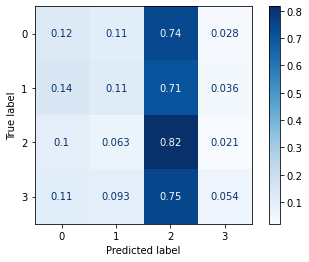

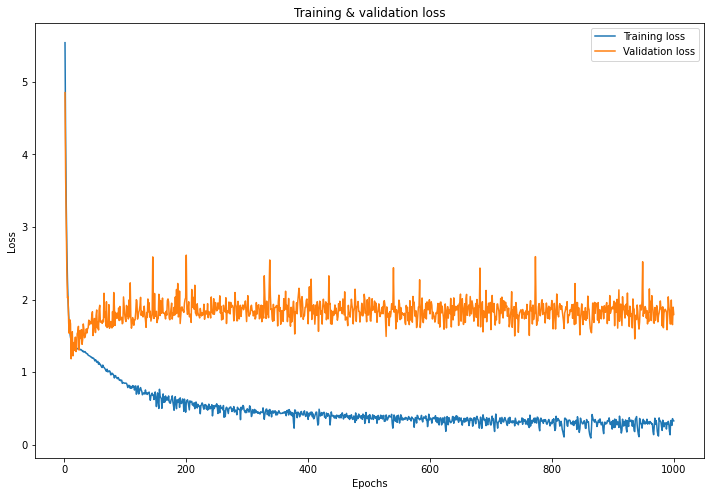

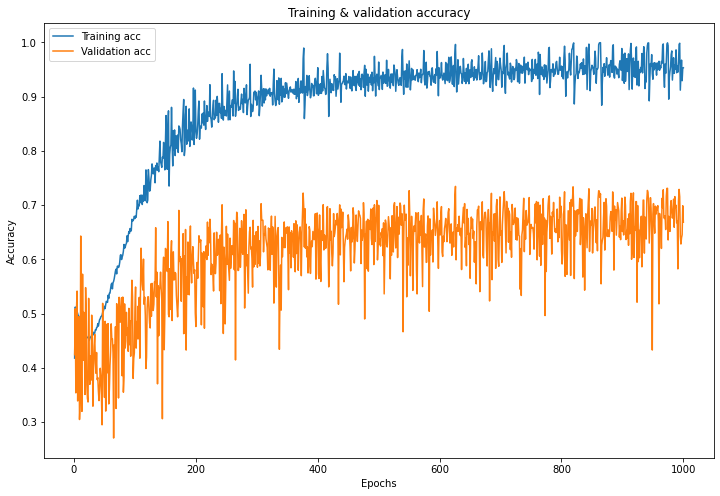

In [109]:
evaluate_results(model_5, preprocessed_val_data, valid_labels)
visualize_training_results(model_5_hist)

### Evaluating Model

In [ ]:
y_pred = xg_balanced_pipe4.predict(preprocessed_test_data)

xg_balanced_pipe4.score(preprocessed_test_data, y_test)

print('Recall score: ', round(recall_score(y_test, y_pred, average='micro'), 3))
print('Precision score: ', round(precision_score(y_test, y_pred, average='micro'), 3))
print('F1 score: ', round(f1_score(y_test, y_pred, average='micro'), 3))